In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler

In [2]:
# Re-loading the original dataset
df = pd.read_csv(r"C:\Users\Acer\Downloads\BankLoanApproval.csv")

# Data Overview


In [3]:
#viewing the head of the datasets
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,IA35XVH6ZO,28,140466,163781,652,94,2,9.08,48,0.23,High School,Unemployed,Married,No,No,Education,No,0
1,Y8UETC3LSG,28,149227,139759,375,56,3,5.84,36,0.80,PhD,Full-time,Divorced,No,No,Education,Yes,1
2,RM6QSRHIYP,41,23265,63527,829,87,4,9.73,60,0.45,Master's,Full-time,Divorced,Yes,No,Auto,Yes,0
3,GX5YQOGROM,53,117550,95744,395,112,4,3.58,24,0.73,High School,Unemployed,Single,No,No,Auto,Yes,0
4,X0BVPZLDC0,57,139699,88143,635,112,4,5.63,48,0.20,Master's,Part-time,Divorced,No,No,Home,No,0


In [4]:
#viewing the shape of the data
df.shape

(255327, 18)

In [5]:
#viewing the description of the data
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000
mean,43.498059,82500.225585,127579.236559,574.266125,59.542516,2.501036,13.492848,36.025896,0.500222,0.116118
std,14.990304,38963.150663,70841.308245,158.904496,34.643129,1.117021,6.636456,16.969297,0.230917,0.320367
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48826.000000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82467.000000,127557.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188986.500000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [6]:
#viewing the description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255327 entries, 0 to 255326
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255327 non-null  object 
 1   Age             255327 non-null  int64  
 2   Income          255327 non-null  int64  
 3   LoanAmount      255327 non-null  int64  
 4   CreditScore     255327 non-null  int64  
 5   MonthsEmployed  255327 non-null  int64  
 6   NumCreditLines  255327 non-null  int64  
 7   InterestRate    255327 non-null  float64
 8   LoanTerm        255327 non-null  int64  
 9   DTIRatio        255327 non-null  float64
 10  Education       255327 non-null  object 
 11  EmploymentType  255327 non-null  object 
 12  MaritalStatus   255327 non-null  object 
 13  HasMortgage     255327 non-null  object 
 14  HasDependents   255327 non-null  object 
 15  LoanPurpose     255327 non-null  object 
 16  HasCoSigner     255327 non-null  object 
 17  Default   

In [7]:
#Viewing the object type of the datasets
print(df.describe(include=['O'])) 

            LoanID   Education EmploymentType MaritalStatus HasMortgage  \
count       255327      255327         255327        255327      255327   
unique      255327           4              4             3           2   
top     IA35XVH6ZO  Bachelor's      Part-time       Married         Yes   
freq             1       64360          64156         85295      127664   

       HasDependents LoanPurpose HasCoSigner  
count         255327      255327      255327  
unique             2           5           2  
top              Yes    Business         Yes  
freq          127735       51296      127690  


# Splitting the datasets

In [9]:
# Splitting the dataset into train, validation, and test datasets
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [10]:
print(len(train_df), "+", len(validation_df), "+", len(test_df))

153196 + 51065 + 51066


# Data preprocessing

In [11]:
#check for null values
#no null values
print("Null values for training datasets")
print(train_df.isnull().sum())
print(train_df.shape)

print('-'*40)

#check for null values
#no null values
print("Null values for validation datasets")
print(validation_df.isnull().sum())
print(validation_df.shape)

print('-'*40)

#check for null values
#no null values
print("Null values for testing datasets")
print(test_df.isnull().sum())
print(test_df.shape)

Null values for training datasets
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
(153196, 18)
----------------------------------------
Null values for validation datasets
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
(51065, 18)
----------------------------------------
Null values for testing datasets
LoanID            0
Age               0
Inco

In [12]:
train_df.drop(['LoanID'], axis=1, inplace = True)
print(train_df.shape)
validation_df.drop(['LoanID'], axis=1, inplace = True)
print(validation_df.shape)
test_df.drop(['LoanID'], axis=1, inplace = True)
print(test_df.shape)

(153196, 17)
(51065, 17)
(51066, 17)


In [13]:
#check for duplicated rows across datasets
train_duplicated_rows = train_df[train_df.duplicated()]
print("Number of duplicated rows :: ", train_duplicated_rows.shape )

validation_duplicated_rows = validation_df[validation_df.duplicated()]
print("Number of duplicated rows :: ", validation_duplicated_rows.shape )

test_duplicated_rows = test_df[test_df.duplicated()]
print("Number of duplicated rows :: ", test_duplicated_rows.shape )

Number of duplicated rows ::  (0, 17)
Number of duplicated rows ::  (0, 17)
Number of duplicated rows ::  (0, 17)


In [14]:
# Encoding and cleaning the training dataset
train_df['Education'] = train_df['Education'].replace({"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3 }).astype(int)
train_df['EmploymentType'] = train_df['EmploymentType'].replace({"Unemployed": 0, "Part-time": 1, "Self-employed": 2, "Full-time":3 }).astype(int)
train_df['MaritalStatus'] = train_df['MaritalStatus'].replace({"Single": 0, "Married": 1, "Divorced": 2 }).astype(int)
train_df['HasMortgage'] = train_df['HasMortgage'].replace({"No": 0, "Yes": 1})
train_df['HasDependents'] = train_df['HasDependents'].replace({"No": 0, "Yes": 1})
train_df['HasCoSigner'] = train_df['HasCoSigner'].replace({"No": 0, "Yes": 1})
train_df.rename(columns = {'Education':'Education_level'}, inplace = True)

# One-hot encoding 'LoanPurpose'
one_hot_encoded_train = pd.get_dummies(train_df['LoanPurpose'], dtype=int)
train_df = pd.concat([train_df, one_hot_encoded_train], axis=1)
train_df.drop(['LoanPurpose'], axis=1, inplace=True)

In [15]:
validation_df['Education'] = validation_df['Education'].replace({"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3 }).astype(int)
validation_df['EmploymentType'] = validation_df['EmploymentType'].replace({"Unemployed": 0, "Part-time": 1, "Self-employed": 2, "Full-time": 3 }).astype(int)
validation_df['MaritalStatus'] = validation_df['MaritalStatus'].replace({"Single": 0, "Married": 1, "Divorced": 2 }).astype(int)
validation_df['HasMortgage'] = validation_df['HasMortgage'].replace({"No": 0, "Yes": 1})
validation_df['HasDependents'] = validation_df['HasDependents'].replace({"No": 0, "Yes": 1})
validation_df['HasCoSigner'] = validation_df['HasCoSigner'].replace({"No": 0, "Yes": 1})
validation_df.rename(columns={'Education': 'Education_level'}, inplace=True)

# One-hot encoding 'LoanPurpose' for validation data
one_hot_encoded_validation = pd.get_dummies(validation_df['LoanPurpose'], dtype=int)
validation_df = pd.concat([validation_df, one_hot_encoded_validation], axis=1)
validation_df.drop(['LoanPurpose'], axis=1, inplace=True)

In [16]:
# Apply the same encoding to the test dataset
test_df['Education'] = test_df['Education'].replace({"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3 }).astype(int)
test_df['EmploymentType'] = test_df['EmploymentType'].replace({"Unemployed": 0, "Part-time": 1, "Self-employed": 2, "Full-time": 3 }).astype(int)
test_df['MaritalStatus'] = test_df['MaritalStatus'].replace({"Single": 0, "Married": 1, "Divorced": 2 }).astype(int)
test_df['HasMortgage'] = test_df['HasMortgage'].replace({"No": 0, "Yes": 1})
test_df['HasDependents'] = test_df['HasDependents'].replace({"No": 0, "Yes": 1})
test_df['HasCoSigner'] = test_df['HasCoSigner'].replace({"No": 0, "Yes": 1})
test_df.rename(columns={'Education': 'Education_level'}, inplace=True)

# One-hot encoding 'LoanPurpose' for test data
one_hot_encoded_test = pd.get_dummies(test_df['LoanPurpose'], dtype=int)
test_df = pd.concat([test_df, one_hot_encoded_test], axis=1)
test_df.drop(['LoanPurpose'], axis=1, inplace=True)

# EDA visualisation


<Axes: title={'center': 'Correlation Matrix'}>

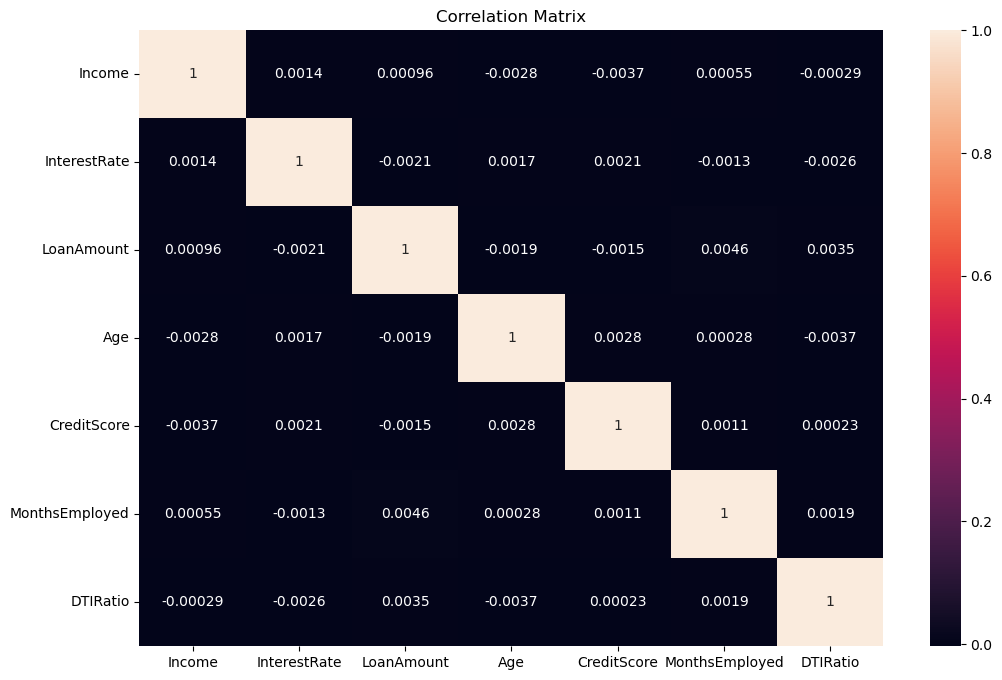

In [128]:
corr = train_df[train_df.select_dtypes(include=['int', 'float']).columns].corr()# plot the heatmap
plt.figure(figsize=(12,8))
plt.title("Correlation Matrix")
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

<Axes: title={'center': 'Relationship between age and Income'}, xlabel='Age', ylabel='Income'>

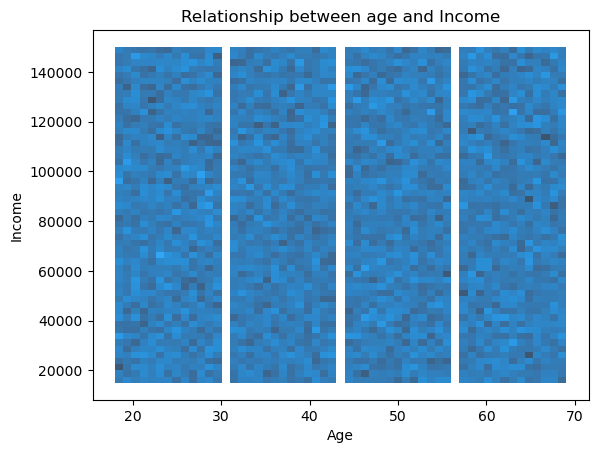

In [18]:
plt.title("Relationship between age and Income")
sns.histplot(data=train_df[["Age", "Income"]], x ="Age", y="Income")


<Axes: title={'center': 'Relationship between MonthsEmployed and Income'}, xlabel='MonthsEmployed', ylabel='Income'>

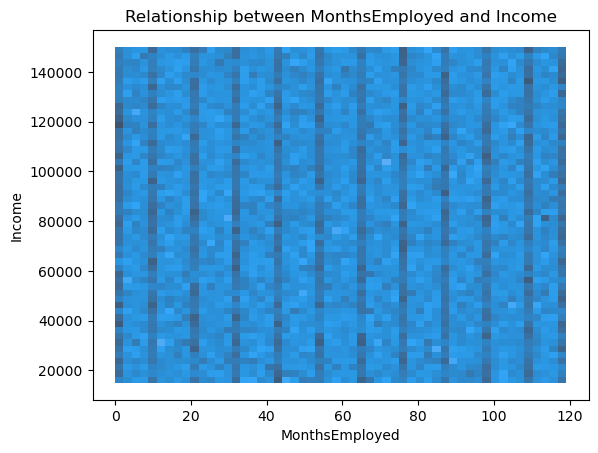

In [19]:
plt.title("Relationship between MonthsEmployed and Income")
sns.histplot(data=train_df[["MonthsEmployed", "Income"]], x ="MonthsEmployed", y="Income")

<Axes: title={'center': 'Relationship between Age and Default'}, xlabel='Age', ylabel='Count'>

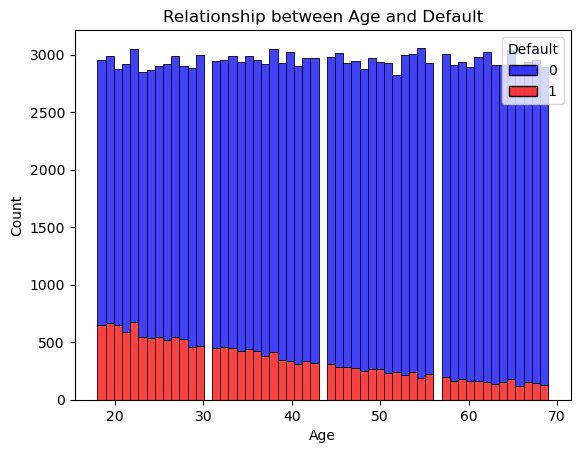

In [20]:
# Age is equally distributed from 18 to 69
# Default tends to be higher on lower ages
plt.title("Relationship between Age and Default")
sns.histplot(data=train_df[["Age", "Default"]] ,x="Age" ,hue="Default", multiple='stack', palette={0 : 'blue', 1 : 'red'})

<Axes: title={'center': 'Relationship between Interest Rate and Default'}, xlabel='InterestRate', ylabel='Count'>

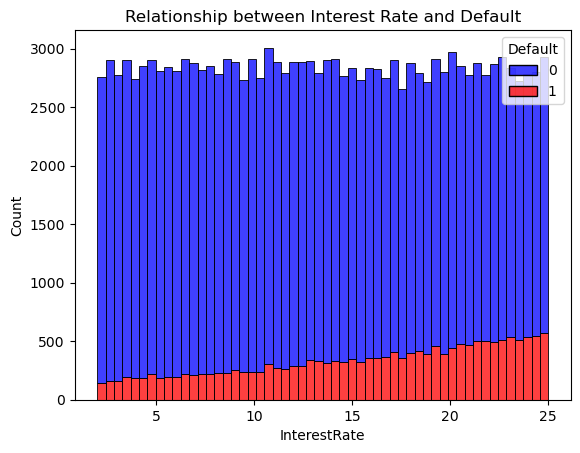

In [21]:
plt.title("Relationship between Interest Rate and Default")
sns.histplot(data=train_df[["InterestRate", "Default"]] , x="InterestRate" ,hue="Default", multiple='stack', palette={0 : 'blue', 1 : 'red'})
# The higher the interest rate , the higher the default rate

<Axes: title={'center': 'Relationship between Income and Default'}, xlabel='Income', ylabel='Count'>

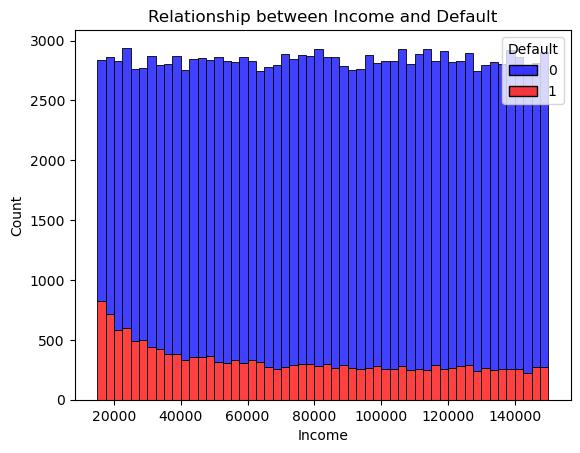

In [22]:
# Distribution of Income
# Default tends to increase when the income is lower
plt.title("Relationship between Income and Default")
sns.histplot(data=train_df[["Income", "Default"]] , x="Income" ,hue="Default", multiple='stack', palette={0 : 'blue', 1 : 'red'})

<Axes: xlabel='CreditScore', ylabel='Count'>

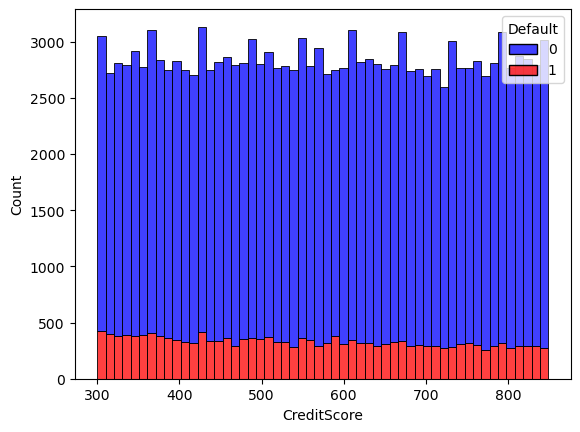

In [23]:
sns.histplot(data=train_df[["CreditScore", "Default"]] , x="CreditScore" ,hue="Default", multiple='stack', palette={0 : 'blue', 1 : 'red'})

<Axes: title={'center': 'Relationship between Loan Amount and Default'}, xlabel='LoanAmount', ylabel='Count'>

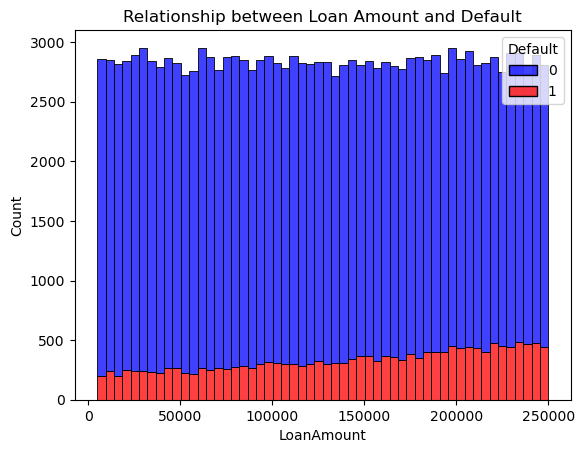

In [24]:
plt.title("Relationship between Loan Amount and Default")
sns.histplot(data=train_df[["LoanAmount", "Default"]] , x="LoanAmount" ,hue="Default", multiple='stack', palette={0 : 'blue', 1 : 'red'})

<Axes: title={'center': 'Relationship between Age and Default'}, xlabel='Default', ylabel='Age'>

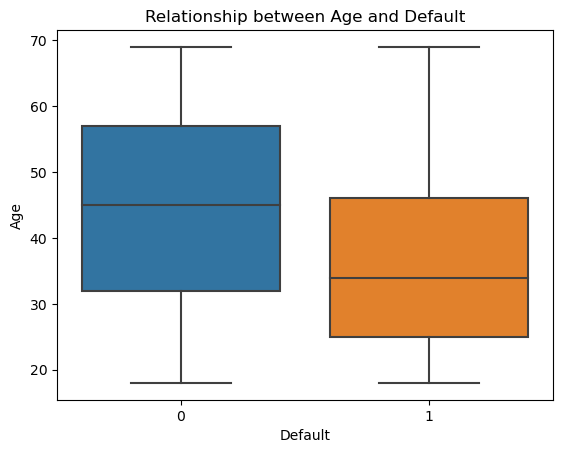

In [25]:
plt.title("Relationship between Age and Default")
sns.boxplot(data=train_df[["Age", "Default"]],  x="Default", y="Age")

<Axes: title={'center': 'Relationship between Interest Rate and Default'}, xlabel='Default', ylabel='InterestRate'>

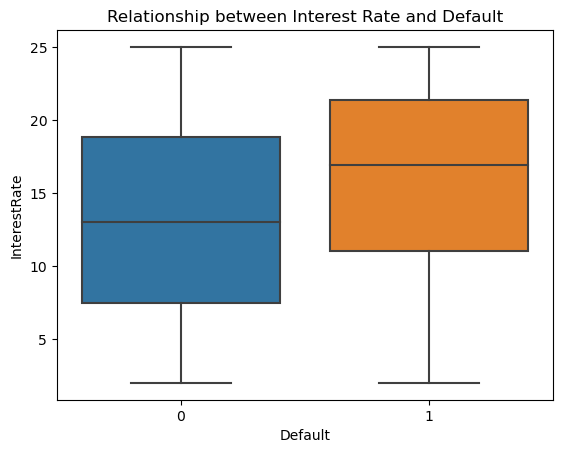

In [26]:
plt.title("Relationship between Interest Rate and Default")
sns.boxplot(data=train_df[["InterestRate", "Default"]],  x="Default", y="InterestRate")

<Axes: title={'center': 'Relationship between Income and Default'}, xlabel='Default', ylabel='Income'>

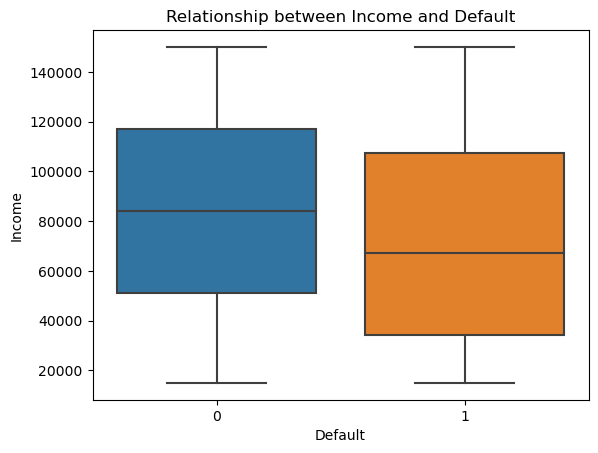

In [27]:
plt.title("Relationship between Income and Default")
sns.boxplot(data=train_df[["Income", "Default"]],  x="Default", y="Income")

<Axes: xlabel='Default', ylabel='CreditScore'>

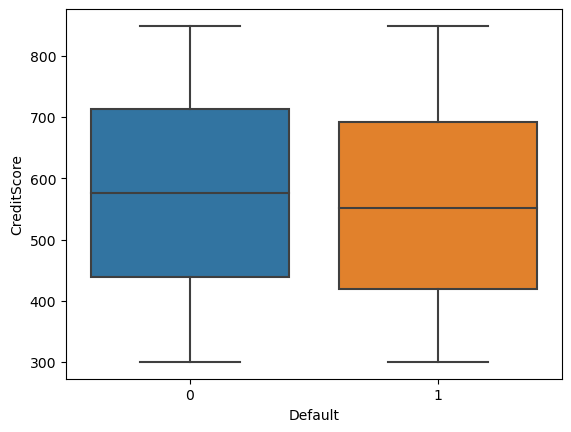

In [28]:
sns.boxplot(data=train_df[["CreditScore", "Default"]],  x="Default", y="CreditScore")
# A little difference in default for credit score
# Credit score which are lower tends to slighty more likely to be default

<Axes: title={'center': 'Relationship between Loan Amount and Default'}, xlabel='Default', ylabel='LoanAmount'>

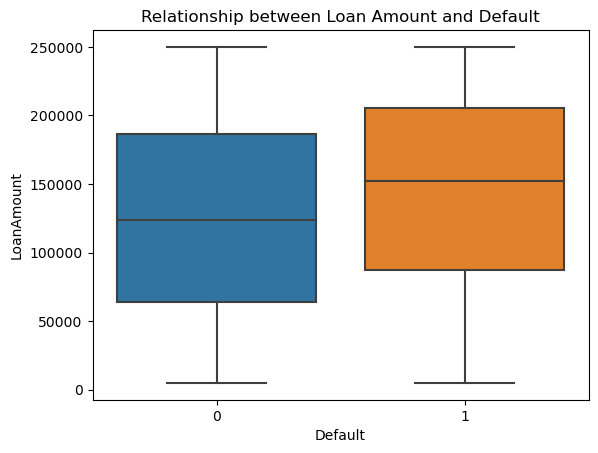

In [29]:
plt.title("Relationship between Loan Amount and Default")
sns.boxplot(data=train_df[["LoanAmount", "Default"]],  x="Default", y="LoanAmount")

<Axes: title={'center': 'Employment Type Count'}, xlabel='EmploymentType', ylabel='count'>

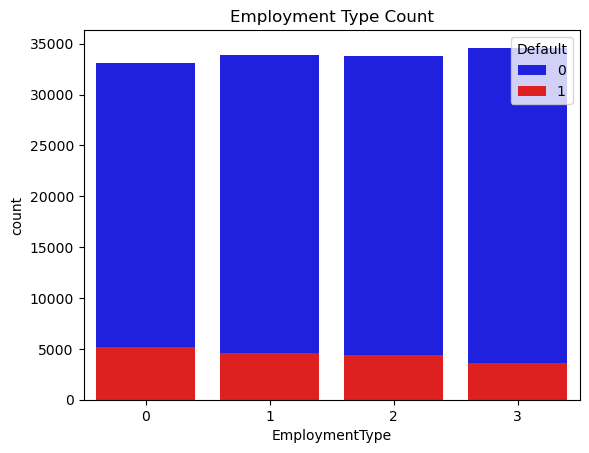

In [30]:
plt.title("Employment Type Count")
sns.countplot(data=train_df[["EmploymentType", "Default"]] , x="EmploymentType" , hue="Default", dodge=False, palette={0 : 'blue', 1 : 'red'})

<Axes: title={'center': 'Has Dependents Count'}, xlabel='HasDependents', ylabel='count'>

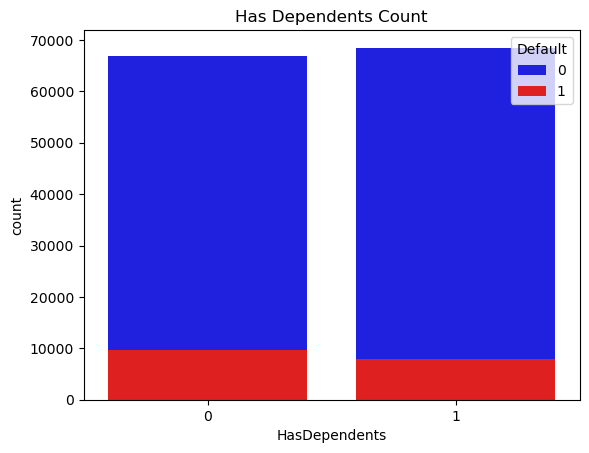

In [31]:
plt.title("Has Dependents Count")
sns.countplot(data=train_df[["HasDependents", "Default"]] , x="HasDependents" , hue="Default", dodge=False, palette={0 : 'blue', 1 : 'red'})

<Axes: title={'center': 'Loan Purpose Count'}, xlabel='LoanPurpose', ylabel='count'>

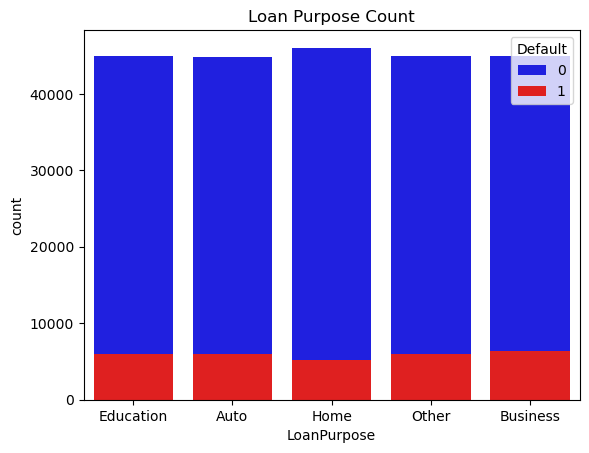

In [32]:
plt.title("Loan Purpose Count")
sns.countplot(data=df[["LoanPurpose", "Default"]] , x="LoanPurpose" , hue="Default", dodge=False, palette={0 : 'blue', 1 : 'red'})

<Axes: title={'center': 'HasMortgage Count'}, xlabel='HasMortgage', ylabel='count'>

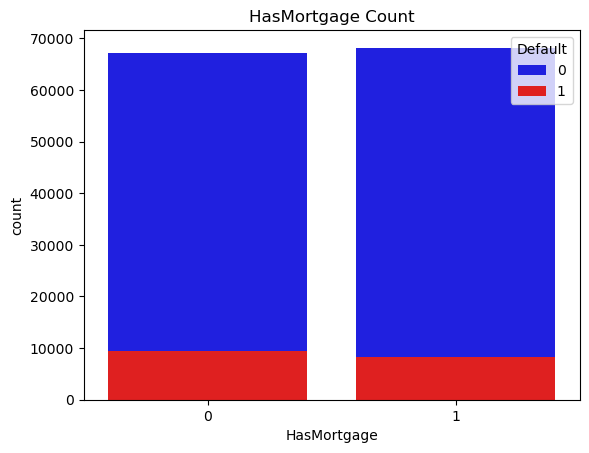

In [33]:
plt.title("HasMortgage Count")
sns.countplot(data=train_df[["HasMortgage", "Default"]] , x="HasMortgage" , hue="Default", dodge=False, palette={0 : 'blue', 1 : 'red'})

In [34]:
train_df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_level,...,MaritalStatus,HasMortgage,HasDependents,HasCoSigner,Default,Auto,Business,Education,Home,Other
144682,41,40091,187157,501,31,1,3.59,36,0.83,3,...,2,1,1,0,0,0,0,1,0,0
59707,36,32862,154816,512,17,1,2.50,12,0.31,1,...,0,0,0,1,0,1,0,0,0,0
155429,19,106163,9059,675,108,4,6.20,36,0.76,2,...,0,1,1,0,0,0,1,0,0,0
129910,50,61237,143200,781,90,4,14.86,24,0.56,0,...,2,0,1,1,0,0,0,0,1,0
204029,36,36601,58211,407,95,4,13.72,12,0.70,0,...,1,0,0,1,0,1,0,0,0,0


# Feature reduction

In [35]:
X_train = train_df.drop(['Default'], axis=1)
y_train = train_df['Default']

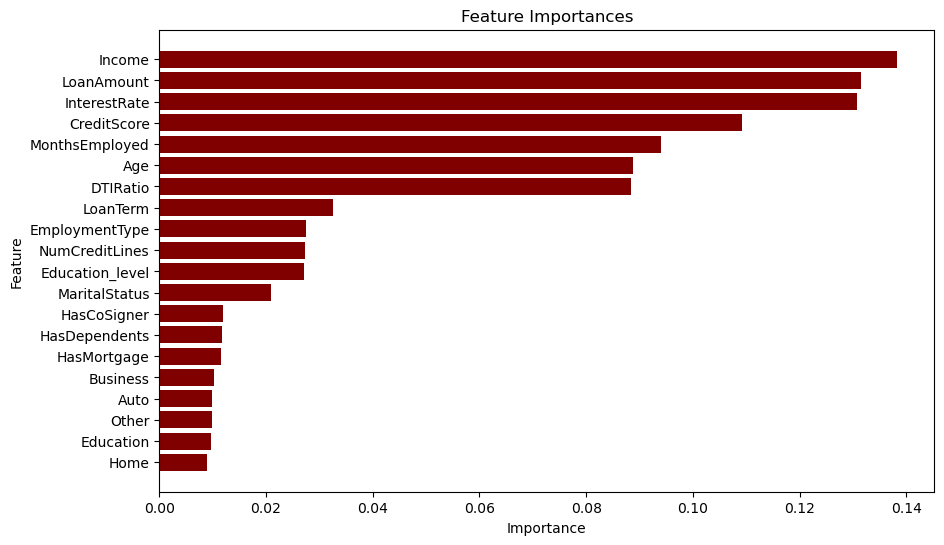

In [36]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='maroon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  
plt.show()

In [37]:
print(importance_df)

            Feature  Importance
1            Income    0.138364
2        LoanAmount    0.131509
6      InterestRate    0.130826
3       CreditScore    0.109121
4    MonthsEmployed    0.094109
0               Age    0.088757
8          DTIRatio    0.088328
7          LoanTerm    0.032531
10   EmploymentType    0.027454
5    NumCreditLines    0.027378
9   Education_level    0.027085
11    MaritalStatus    0.020831
14      HasCoSigner    0.011996
13    HasDependents    0.011694
12      HasMortgage    0.011503
16         Business    0.010264
15             Auto    0.009843
19            Other    0.009812
17        Education    0.009752
18             Home    0.008844


In [38]:
X_train = train_df[['Income', 'InterestRate', 'LoanAmount', 'Age', 'CreditScore',
          'MonthsEmployed', 'DTIRatio']]
y_train = train_df['Default']

In [39]:
X_validation = validation_df[['Income', 'InterestRate', 'LoanAmount', 'Age', 'CreditScore',
          'MonthsEmployed', 'DTIRatio']]
y_validation = validation_df['Default']

In [40]:
X_test = test_df[['Income', 'InterestRate', 'LoanAmount', 'Age', 'CreditScore',
          'MonthsEmployed', 'DTIRatio']]
y_test = test_df['Default']

# Standardising data

In [41]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

# Models before sampling

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

In [43]:
import time

# Define classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'Linear SVC': LinearSVC(random_state=42),  # No need for probability=True as we're not using predict_proba
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(n_estimators=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Neural Network': MLPClassifier(random_state=42)
}

# Loop through classifiers and calculate evaluation metrics on validation and test datasets
for classifier_name, classifier in classifiers.items():
    start_time = time.time()  # Start timing
    
    # Train the classifier on resampled training data
    classifier.fit(X_train_scaled, y_train)
    
    # Validate the classifier on validation dataset
    y_pred_validation = classifier.predict(X_validation_scaled)
    
    # Generate classification report for validation dataset
    classification_rep_validation = classification_report(y_validation, y_pred_validation)
    print(f"Classification Report for {classifier_name} (Validation):\n{classification_rep_validation}")
    
    # Calculate ROC AUC score for validation dataset
    y_scores_validation = classifier.predict(X_validation_scaled)
    roc_auc_validation = roc_auc_score(y_validation, y_scores_validation)
    print(f"ROC AUC for {classifier_name} (Validation): {roc_auc_validation:.2f}\n")
    
    # Test the classifier on test dataset
    y_pred_test = classifier.predict(X_test_scaled)
    
    # Generate classification report for test dataset
    classification_rep_test = classification_report(y_test, y_pred_test)
    print(f"Classification Report for {classifier_name} (Test):\n{classification_rep_test}")
    
    # Calculate ROC AUC score for test dataset
    y_scores_test = classifier.predict(X_test_scaled)
    roc_auc_test = roc_auc_score(y_test, y_scores_test)
    print(f"ROC AUC for {classifier_name} (Test): {roc_auc_test:.2f}\n")
    
    end_time = time.time()  # End timing
    execution_time = end_time - start_time
    print(f"Execution time for {classifier_name}: {execution_time:.2f} seconds\n")

Classification Report for Decision Tree (Validation):
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     45145
           1       0.20      0.23      0.21      5920

    accuracy                           0.81     51065
   macro avg       0.55      0.56      0.55     51065
weighted avg       0.82      0.81      0.81     51065

ROC AUC for Decision Tree (Validation): 0.56

Classification Report for Decision Tree (Test):
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     45126
           1       0.20      0.23      0.22      5940

    accuracy                           0.81     51066
   macro avg       0.55      0.56      0.55     51066
weighted avg       0.82      0.81      0.81     51066

ROC AUC for Decision Tree (Test): 0.56

Execution time for Decision Tree: 1.42 seconds

Classification Report for Random Forest (Validation):
              precision    recall  f1-score   support

 

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Acer\anaconda3\Lib\site-pack

Classification Report for Linear SVC (Validation):
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     45145
           1       0.00      0.00      0.00      5920

    accuracy                           0.88     51065
   macro avg       0.44      0.50      0.47     51065
weighted avg       0.78      0.88      0.83     51065

ROC AUC for Linear SVC (Validation): 0.50

Classification Report for Linear SVC (Test):
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     45126
           1       0.00      0.00      0.00      5940

    accuracy                           0.88     51066
   macro avg       0.44      0.50      0.47     51066
weighted avg       0.78      0.88      0.83     51066

ROC AUC for Linear SVC (Test): 0.50

Execution time for Linear SVC: 5.15 seconds

Classification Report for k-NN (Validation):
              precision    recall  f1-score   support

           0       0.89  

# Oversampling using SMOTETOMEK

In [44]:
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks  # Import TomekLinks
#Create Smote pipeline
# Create SMOTETomek pipeline
SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')))

# Fit the pipeline to your training data
SMOTETomek_pipeline.fit(X_train, y_train)

# Transform your original training data to obtain the balanced dataset
X_train_resampled, y_train_resampled = SMOTETomek_pipeline.fit_resample(X_train_scaled, y_train)

In [45]:
y_train_resampled.value_counts(normalize=True)

Default
1    0.501053
0    0.498947
Name: proportion, dtype: float64

In [46]:
# Check the number of rows in X_train and y_train
print("Number of rows in X_train:", X_train_resampled.shape[0])
print("Number of rows in y_train:", y_train_resampled.shape[0])

# Check the number of rows in X_validation and y_validation
print("Number of rows in X_validation:", X_validation_scaled.shape[0])
print("Number of rows in y_validation:", y_validation.shape[0])

# Check the number of rows in X_test and y_test
print("Number of rows in X_test:", X_test_scaled.shape[0])
print("Number of rows in y_test:", y_test.shape[0])

Number of rows in X_train: 270247
Number of rows in y_train: 270247
Number of rows in X_validation: 51065
Number of rows in y_validation: 51065
Number of rows in X_test: 51066
Number of rows in y_test: 51066


# Models Before Tuning

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

In [48]:
import time

# Define classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'Linear SVC': LinearSVC(random_state=42),  # No need for probability=True as we're not using predict_proba
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(n_estimators=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Neural Network': MLPClassifier(random_state=42)
}

# Loop through classifiers and calculate evaluation metrics on validation and test datasets
for classifier_name, classifier in classifiers.items():
    start_time = time.time()  # Start timing
    
    # Train the classifier on resampled training data
    classifier.fit(X_train_resampled, y_train_resampled)
    
    # Validate the classifier on validation dataset
    y_pred_validation = classifier.predict(X_validation_scaled)
    
    # Generate classification report for validation dataset
    classification_rep_validation = classification_report(y_validation, y_pred_validation)
    print(f"Classification Report for {classifier_name} (Validation):\n{classification_rep_validation}")
    
    # Calculate ROC AUC score for validation dataset
    y_scores_validation = classifier.predict(X_validation_scaled)
    roc_auc_validation = roc_auc_score(y_validation, y_scores_validation)
    print(f"ROC AUC for {classifier_name} (Validation): {roc_auc_validation:.2f}\n")
    
    # Test the classifier on test dataset
    y_pred_test = classifier.predict(X_test_scaled)
    
    # Generate classification report for test dataset
    classification_rep_test = classification_report(y_test, y_pred_test)
    print(f"Classification Report for {classifier_name} (Test):\n{classification_rep_test}")
    
    # Calculate ROC AUC score for test dataset
    y_scores_test = classifier.predict(X_test_scaled)
    roc_auc_test = roc_auc_score(y_test, y_scores_test)
    print(f"ROC AUC for {classifier_name} (Test): {roc_auc_test:.2f}\n")
    
    end_time = time.time()  # End timing
    execution_time = end_time - start_time
    print(f"Execution time for {classifier_name}: {execution_time:.2f} seconds\n")


Classification Report for Decision Tree (Validation):
              precision    recall  f1-score   support

           0       0.90      0.85      0.87     45145
           1       0.19      0.26      0.22      5920

    accuracy                           0.78     51065
   macro avg       0.54      0.55      0.54     51065
weighted avg       0.81      0.78      0.80     51065

ROC AUC for Decision Tree (Validation): 0.55

Classification Report for Decision Tree (Test):
              precision    recall  f1-score   support

           0       0.90      0.85      0.87     45126
           1       0.19      0.27      0.22      5940

    accuracy                           0.78     51066
   macro avg       0.54      0.56      0.55     51066
weighted avg       0.82      0.78      0.80     51066

ROC AUC for Decision Tree (Test): 0.56

Execution time for Decision Tree: 3.70 seconds

Classification Report for Random Forest (Validation):
              precision    recall  f1-score   support

 

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



Classification Report for Linear SVC (Validation):
              precision    recall  f1-score   support

           0       0.94      0.66      0.78     45145
           1       0.21      0.68      0.32      5920

    accuracy                           0.66     51065
   macro avg       0.58      0.67      0.55     51065
weighted avg       0.86      0.66      0.72     51065

ROC AUC for Linear SVC (Validation): 0.67

Classification Report for Linear SVC (Test):
              precision    recall  f1-score   support

           0       0.94      0.66      0.77     45126
           1       0.21      0.69      0.32      5940

    accuracy                           0.66     51066
   macro avg       0.58      0.67      0.55     51066
weighted avg       0.86      0.66      0.72     51066

ROC AUC for Linear SVC (Test): 0.67

Execution time for Linear SVC: 15.96 seconds

Classification Report for k-NN (Validation):
              precision    recall  f1-score   support

           0       0.91 

# Models after tuning

Best k value: 37
Best f1-score: 0.2940699872680273
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     45126
           1       0.19      0.65      0.29      5940

    accuracy                           0.64     51066
   macro avg       0.56      0.64      0.53     51066
weighted avg       0.85      0.64      0.70     51066



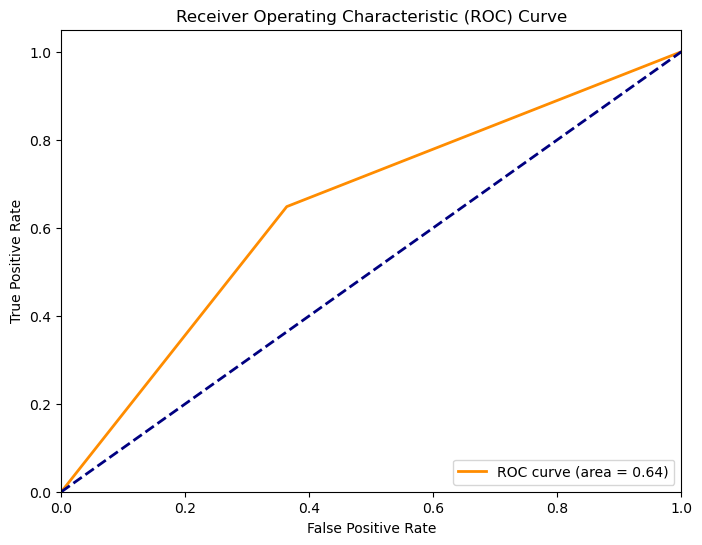

Elapsed Time for KNN: 167.95806503295898 seconds


In [49]:
# Initialize variables to store best k value and corresponding f1-score
best_k = None
best_f1_score = 0

# Initialize lists to store f1-scores and ROC AUC scores for each k
f1_scores = []
roc_auc_scores = []

#start timer for Naive Bayes
start_time_knn = time.time()

# Loop through k values from 11 to 41
for k in range(11, 41, 2):
    # Create KNN model with current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model on resampled training data
    knn.fit(X_train_resampled, y_train_resampled)
    
    # Validate the model on validation dataset
    y_pred = knn.predict(X_validation_scaled)
    
    # Calculate f1-score
    f1 = f1_score(y_validation, y_pred)
    
    # Store f1-score for current k value
    f1_scores.append(f1)
    
    # Store ROC AUC score for current k value
    roc_auc_scores.append(roc_auc_score(y_validation, y_pred))
    
    # Check if current f1-score is better than the best f1-score
    if f1 > best_f1_score:
        best_f1_score = f1
        best_k = k

# Print the best k value and corresponding f1-score
print("Best k value:", best_k)
print("Best f1-score:", best_f1_score)

# Create KNN model with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the final model on the resampled training data
best_knn.fit(X_train_resampled, y_train_resampled)

# Test the final model on the test dataset
y_pred_test = best_knn.predict(X_test_scaled)

#end time for Naive Bayes
end_time_knn = time.time()

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Plot ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate total time for Naive Bayes
elapsed_time_knn = end_time_knn - start_time_knn
print("Elapsed Time for KNN:", elapsed_time_knn, "seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found for Naive Bayes:  {}
Best F1 score found for Naive Bayes:  0.6821592810537861
Validation Performance for Naive Bayes
              precision    recall  f1-score   support

           0       0.94      0.66      0.77     45145
           1       0.21      0.69      0.32      5920

    accuracy                           0.66     51065
   macro avg       0.57      0.67      0.55     51065
weighted avg       0.86      0.66      0.72     51065



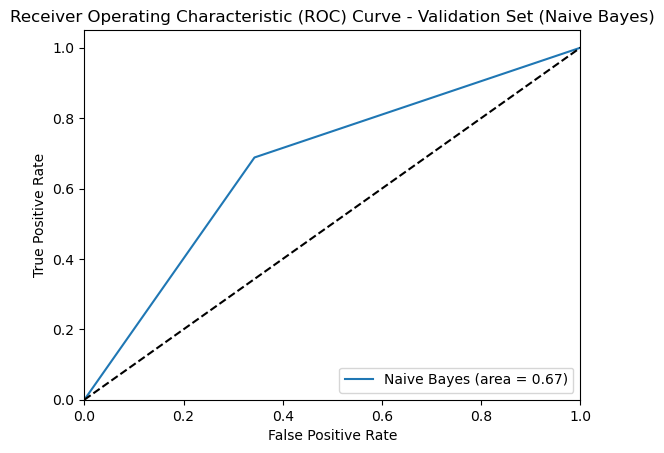

Testing Performance for Naive Bayes
              precision    recall  f1-score   support

           0       0.94      0.65      0.77     45126
           1       0.21      0.69      0.32      5940

    accuracy                           0.66     51066
   macro avg       0.58      0.67      0.55     51066
weighted avg       0.86      0.66      0.72     51066



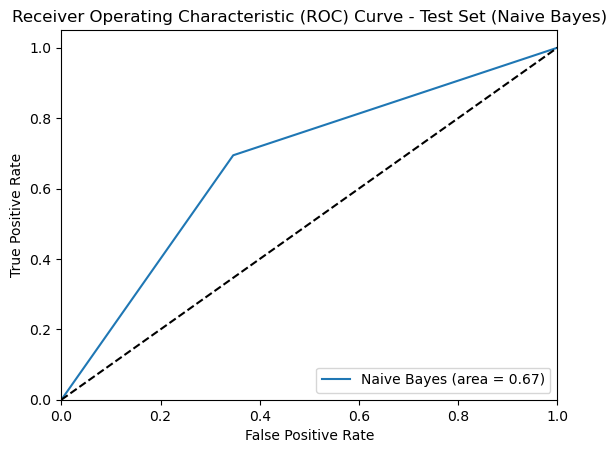

Elapsed Time for Naive Bayes: 3.4852731227874756 seconds


In [50]:
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.model_selection import StratifiedKFold

# Define the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the parameter grid (empty since Naive Bayes doesn't have hyperparameters to tune)
param_grid_nb = {}

# Define the stratified cross-validation strategy
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the grid search with stratified cross-validation on the training data for Naive Bayes
grid_search_nb = GridSearchCV(estimator=nb_classifier, param_grid=param_grid_nb, scoring='f1', cv=stratified_cv, n_jobs=-1, verbose=2)

#start timer for Naive Bayes
start_time_nb = time.time()

# Execute the grid search on the resampled training data for Naive Bayes
grid_search_nb.fit(X_train_resampled, y_train_resampled)

# Output the best parameters and corresponding score for Naive Bayes
print("Best parameters found for Naive Bayes: ", grid_search_nb.best_params_)
print("Best F1 score found for Naive Bayes: ", grid_search_nb.best_score_)

# Predict on the validation data using the best model from grid search for Naive Bayes
best_nb = grid_search_nb.best_estimator_
y_pred_validation_nb = best_nb.predict(X_validation_scaled)

# Calculate and print evaluation metrics on validation data for Naive Bayes
print("Validation Performance for Naive Bayes")
print(classification_report(y_validation, y_pred_validation_nb))

# Plot ROC Curve for the validation set for Naive Bayes
fpr_validation_nb, tpr_validation_nb, _ = roc_curve(y_validation, y_pred_validation_nb)
roc_auc_validation_nb = roc_auc_score(y_validation, y_pred_validation_nb)
plt.figure()
plt.plot(fpr_validation_nb, tpr_validation_nb, label=f'Naive Bayes (area = {roc_auc_validation_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set (Naive Bayes)')
plt.legend(loc='lower right')
plt.show()

# Finally, evaluate the model on the test set for Naive Bayes
y_pred_test_nb = best_nb.predict(X_test_scaled)

#end time for Naive Bayes
end_time_nb = time.time()

# Calculate and print evaluation metrics on test data for Naive Bayes
print("Testing Performance for Naive Bayes")
print(classification_report(y_test, y_pred_test_nb))

# Plot ROC Curve for the test set for Naive Bayes
fpr_test_nb, tpr_test_nb, _ = roc_curve(y_test, y_pred_test_nb)
roc_auc_test_nb = roc_auc_score(y_test, y_pred_test_nb)
plt.figure()
plt.plot(fpr_test_nb, tpr_test_nb, label=f'Naive Bayes (area = {roc_auc_test_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set (Naive Bayes)')
plt.legend(loc='lower right')
plt.show()

# Calculate total time for Naive Bayes
elapsed_time_nb = end_time_nb - start_time_nb
print("Elapsed Time for Naive Bayes:", elapsed_time_nb, "seconds")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best F1 score found:  0.9143976012519432
Validation Performance
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     45145
           1       0.29      0.30      0.29      5920

    accuracy                           0.84     51065
   macro avg       0.60      0.60      0.60     51065
weighted avg       0.84      0.84      0.84     51065



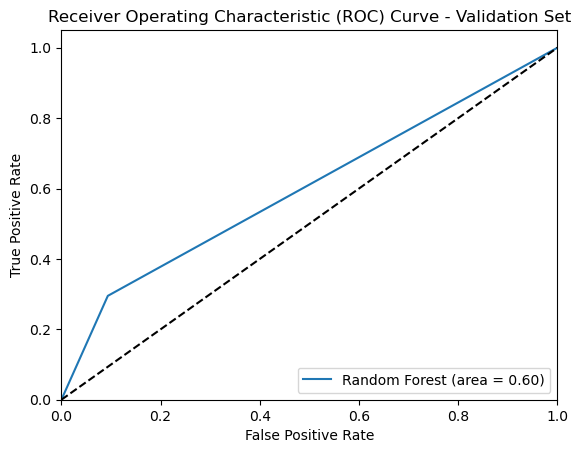

Testing Performance
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     45126
           1       0.31      0.31      0.31      5940

    accuracy                           0.84     51066
   macro avg       0.61      0.61      0.61     51066
weighted avg       0.84      0.84      0.84     51066



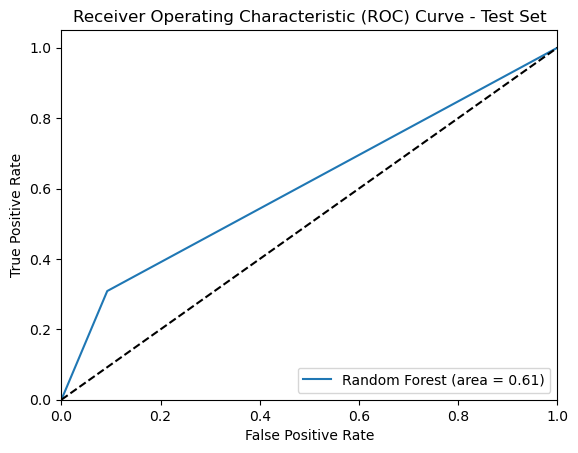

Elapsed Time for Random Forest 1: 821.3290178775787 seconds


In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


# Define the classifier with default parameters
rf_classifier = RandomForestClassifier(random_state=13, criterion='entropy', class_weight='balanced', n_estimators=100)

# Define the parameter distribution for Randomized Search
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}

# Set up Stratified K-Fold cross-validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the random search with stratified cross-validation on the training data
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, scoring='f1',
                                   cv=stratified_cv, n_iter=10, n_jobs=-1, random_state=42, verbose=2)

# Start timer
start_time_rf1 = time.time()

# Execute the random search on the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Output the best parameters and corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Best F1 score found: ", random_search.best_score_)

# Predict on the validation data using the best model from random search
best_rf = random_search.best_estimator_
y_pred_validation = best_rf.predict(X_validation_scaled)

# Calculate and print evaluation metrics on validation data
print("Validation Performance")
print(classification_report(y_validation, y_pred_validation))

# Plot ROC Curve for the validation set
fpr_validation, tpr_validation, _ = roc_curve(y_validation, y_pred_validation)
roc_auc_validation = roc_auc_score(y_validation, y_pred_validation)
plt.figure()
plt.plot(fpr_validation, tpr_validation, label=f'Random Forest (area = {roc_auc_validation:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

# Finally, evaluate the model on the test set
y_pred_test = best_rf.predict(X_test_scaled)

# End timer
end_time_rf1 = time.time()

# Calculate and print evaluation metrics on test data
print("Testing Performance")
print(classification_report(y_test, y_pred_test))

# Plot ROC Curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label=f'Random Forest (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc='lower right')
plt.show()

# Calculate total time for Random Forest
elapsed_time_rf1 = end_time_rf1 - start_time_rf1
print("Elapsed Time for Random Forest 1:", elapsed_time_rf1, "seconds")

Training Performance (Cross-Validation)
              precision    recall  f1-score   support

           0       0.72      0.72      0.72    134839
           1       0.72      0.73      0.72    135408

    accuracy                           0.72    270247
   macro avg       0.72      0.72      0.72    270247
weighted avg       0.72      0.72      0.72    270247


Validation Performance
              precision    recall  f1-score   support

           0       0.93      0.71      0.81     45145
           1       0.22      0.62      0.33      5920

    accuracy                           0.70     51065
   macro avg       0.58      0.67      0.57     51065
weighted avg       0.85      0.70      0.75     51065


Testing Performance
              precision    recall  f1-score   support

           0       0.94      0.71      0.81     45126
           1       0.22      0.63      0.33      5940

    accuracy                           0.70     51066
   macro avg       0.58      0.67      0.57

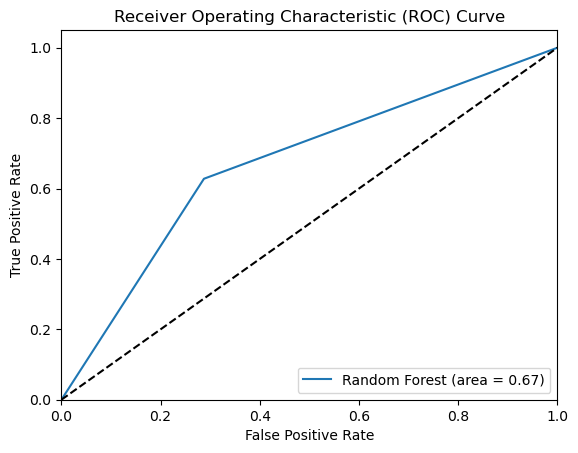

Elapsed Time for Random Forest 2: 697.0465490818024 seconds


In [52]:
#Training random forest with the best tuning i've found
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Define the classifier with the specified parameters
rf_classifier_2 = RandomForestClassifier(random_state=13, criterion='entropy', class_weight='balanced',
                                          n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=2)

# Start timer
start_time_rf2 = time.time()

# Define the StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation
y_train_pred_cv = cross_val_predict(rf_classifier_2, X_train_resampled, y_train_resampled, cv=stratified_kfold)

# Calculate and print evaluation metrics for the training set
print("Training Performance (Cross-Validation)")
print(classification_report(y_train_resampled, y_train_pred_cv))

# Validate on the validation dataset
rf_classifier_2.fit(X_train_resampled, y_train_resampled)  # Fit the model on the entire training set
y_val_pred = rf_classifier_2.predict(X_validation_scaled)

# Calculate and print evaluation metrics for validation set
print("\nValidation Performance")
print(classification_report(y_validation, y_val_pred))

# Predict on the test data
y_test_pred = rf_classifier_2.predict(X_test_scaled)

# End timer
end_time_rf2 = time.time()

# Calculate and print evaluation metrics for test set
print("\nTesting Performance")
print(classification_report(y_test, y_test_pred))

# Calculate ROC AUC for the test set
roc_auc = roc_auc_score(y_test, y_test_pred)

# ROC Curve for the test set
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate total time for Random Forest
elapsed_time_rf2 = end_time_rf2 - start_time_rf2
print("Elapsed Time for Random Forest 2:", elapsed_time_rf2, "seconds")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



Best parameters found:  {'warm_start': False, 'solver': 'sag', 'penalty': None, 'multi_class': 'multinomial', 'intercept_scaling': 3.9, 'fit_intercept': False, 'class_weight': 'balanced', 'C': 2.3}
Best F1 score found:  0.705691309184705
Validation Performance for Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.53      0.68     45145
           1       0.18      0.79      0.29      5920

    accuracy                           0.56     51065
   macro avg       0.57      0.66      0.49     51065
weighted avg       0.86      0.56      0.64     51065



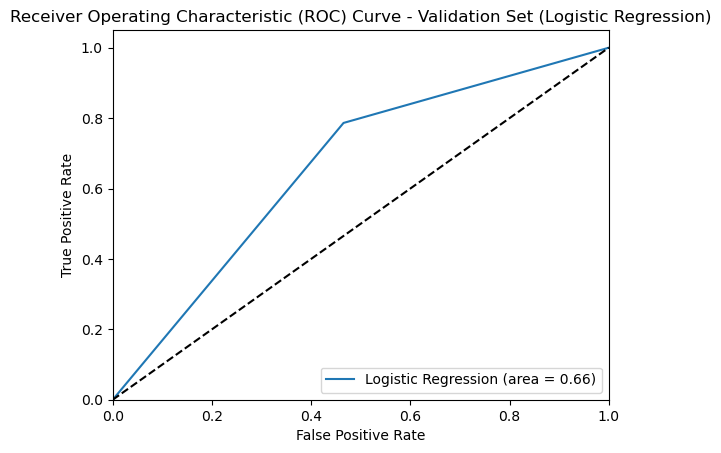

Best Threshold: 0.1, Best F1 Score: 0.2948
Validation Performance for Logistic Regression (Using Best Threshold)
              precision    recall  f1-score   support

           0       0.95      0.53      0.68     45145
           1       0.18      0.79      0.29      5920

    accuracy                           0.56     51065
   macro avg       0.57      0.66      0.49     51065
weighted avg       0.86      0.56      0.64     51065

Testing Performance for Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.54      0.69     45126
           1       0.18      0.79      0.30      5940

    accuracy                           0.57     51066
   macro avg       0.57      0.66      0.49     51066
weighted avg       0.86      0.57      0.64     51066



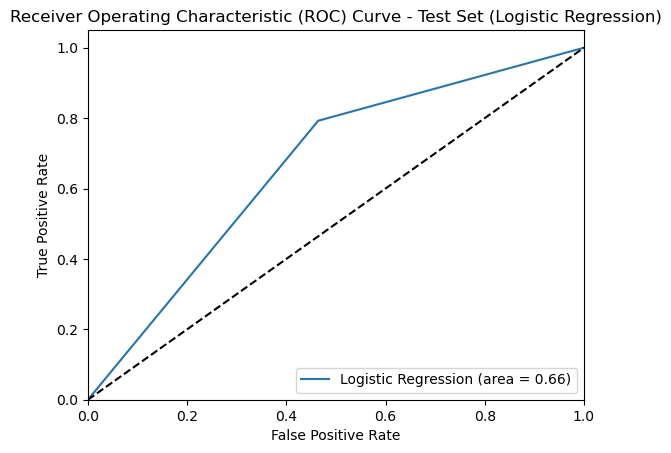

Elapsed Time for Logistic Regression: 24.15823268890381 seconds


In [53]:
# Define the logistic regression classifier with default parameters
log_reg_classifier = LogisticRegression(random_state=13, class_weight='balanced', max_iter=1000)

# Define the parameter distribution for Randomized Search
param_dist_log_reg = {
    "penalty": ["l2", None],
    "solver" : ["lbfgs", "newton-cg", "newton-cholevsky", "sag", "saga"],
    "multi_class" : ["auto", "ovr", "multinomial"],
    "C": [i / 10 for i in range(1, 101)],
    "class_weight": ["balanced"],
    "intercept_scaling": [i / 10 for i in range(1, 51)],
    "fit_intercept": [True, False],
    "warm_start": [True, False],
}

# Set up the random search with stratified cross-validation on the training data
random_search_log_reg = RandomizedSearchCV(estimator=log_reg_classifier, param_distributions=param_dist_log_reg, scoring='f1', cv=stratified_cv, n_iter=10, n_jobs=-1, random_state=42, verbose=2)

# Start timer
start_time_log_reg = time.time()

# Execute the random search on the resampled training data
random_search_log_reg.fit(X_train_resampled, y_train_resampled)

# Output the best parameters and corresponding score
print("Best parameters found: ", random_search_log_reg.best_params_)
print("Best F1 score found: ", random_search_log_reg.best_score_)

# Predict on the validation data using the best model from random search
best_log_reg = random_search_log_reg.best_estimator_
y_pred_validation_log_reg = best_log_reg.predict(X_validation_scaled)

# Calculate and print evaluation metrics on validation data
print("Validation Performance for Logistic Regression")
print(classification_report(y_validation, y_pred_validation_log_reg))

# Plot ROC Curve for the validation set
fpr_validation_log_reg, tpr_validation_log_reg, _ = roc_curve(y_validation, y_pred_validation_log_reg)
roc_auc_validation_log_reg = roc_auc_score(y_validation, y_pred_validation_log_reg)
plt.figure()
plt.plot(fpr_validation_log_reg, tpr_validation_log_reg, label=f'Logistic Regression (area = {roc_auc_validation_log_reg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()

# Loop through thresholds to find the one with the highest F1-score
best_f1_score = -1
best_threshold = None
for threshold in np.arange(0.1, 1.0, 0.1):
    y_pred_validation_log_reg_thresholded = (y_pred_validation_log_reg > threshold).astype(int)
    f1 = f1_score(y_validation, y_pred_validation_log_reg_thresholded)
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}, Best F1 Score: {best_f1_score:.4f}")

# Use the best threshold for predictions on the validation set
y_pred_validation_log_reg_best_threshold = (y_pred_validation_log_reg > best_threshold).astype(int)

# Calculate and print evaluation metrics on validation data using the best threshold
print("Validation Performance for Logistic Regression (Using Best Threshold)")
print(classification_report(y_validation, y_pred_validation_log_reg_best_threshold))

# Finally, evaluate the model on the test set
y_pred_test_log_reg = best_log_reg.predict(X_test_scaled)

# End timer
end_time_log_reg = time.time()

# Calculate and print evaluation metrics on test data
print("Testing Performance for Logistic Regression")
print(classification_report(y_test, y_pred_test_log_reg))

# Plot ROC Curve for the test set
fpr_test_log_reg, tpr_test_log_reg, _ = roc_curve(y_test, y_pred_test_log_reg)
roc_auc_test_log_reg = roc_auc_score(y_test, y_pred_test_log_reg)
plt.figure()
plt.plot(fpr_test_log_reg, tpr_test_log_reg, label=f'Logistic Regression (area = {roc_auc_test_log_reg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()

# Calculate total time for Logistic Regression
elapsed_time_log_reg = end_time_log_reg - start_time_log_reg
print("Elapsed Time for Logistic Regression:", elapsed_time_log_reg, "seconds")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.05}
Best F1 score found:  0.7998617625813027
Validation Performance
              precision    recall  f1-score   support

           0       0.92      0.80      0.86     45145
           1       0.25      0.50      0.33      5920

    accuracy                           0.77     51065
   macro avg       0.59      0.65      0.59     51065
weighted avg       0.85      0.77      0.80     51065



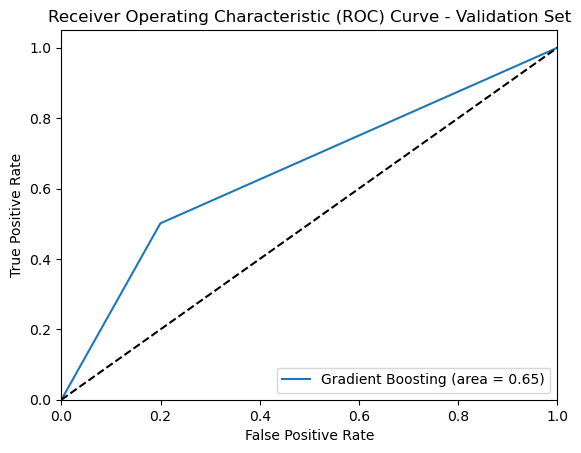

Testing Performance
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     45126
           1       0.25      0.52      0.34      5940

    accuracy                           0.77     51066
   macro avg       0.59      0.66      0.60     51066
weighted avg       0.85      0.77      0.80     51066



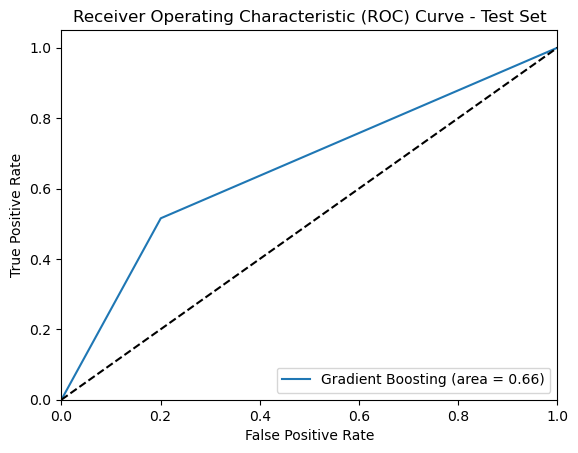

Elapsed Time for Gradient Boosting: 815.9247770309448 seconds


In [54]:
# Define the classifier with default parameters and balanced class weights
gb_classifier = GradientBoostingClassifier(random_state=13)

# Define the parameter distribution for Randomized Search
param_dist_gb = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0]  # Fraction of samples used for fitting the individual base learners
}

# Set up the random search with stratified cross-validation on the training data
random_search_gb = RandomizedSearchCV(estimator=gb_classifier, param_distributions=param_dist_gb, scoring='f1', cv=stratified_cv, n_iter=10, n_jobs=-1, random_state=42, verbose=2)

# Start timer
start_time_gb = time.time()

# Execute the random search on the resampled training data
random_search_gb.fit(X_train_resampled, y_train_resampled)

# Output the best parameters and corresponding score
print("Best parameters found: ", random_search_gb.best_params_)
print("Best F1 score found: ", random_search_gb.best_score_)

# Predict on the validation data using the best model from random search
best_gb = random_search_gb.best_estimator_
y_pred_validation_gb = best_gb.predict(X_validation_scaled)

# Calculate and print evaluation metrics on validation data
print("Validation Performance")
print(classification_report(y_validation, y_pred_validation_gb))

# Plot ROC Curve for the validation set
fpr_validation_gb, tpr_validation_gb, _ = roc_curve(y_validation, y_pred_validation_gb)
roc_auc_validation_gb = roc_auc_score(y_validation, y_pred_validation_gb)
plt.figure()
plt.plot(fpr_validation_gb, tpr_validation_gb, label=f'Gradient Boosting (area = {roc_auc_validation_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

# Finally, evaluate the model on the test set
y_pred_test_gb = best_gb.predict(X_test_scaled)

# End timer
end_time_gb = time.time()

# Calculate and print evaluation metrics on test data
print("Testing Performance")
print(classification_report(y_test, y_pred_test_gb))

# Plot ROC Curve for the test set
fpr_test_gb, tpr_test_gb, _ = roc_curve(y_test, y_pred_test_gb)
roc_auc_test_gb = roc_auc_score(y_test, y_pred_test_gb)
plt.figure()
plt.plot(fpr_test_gb, tpr_test_gb, label=f'Gradient Boosting (area = {roc_auc_test_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc='lower right')
plt.show()

# Calculate total time for Gradient Boosting
elapsed_time_gb = end_time_gb - start_time_gb
print("Elapsed Time for Gradient Boosting:", elapsed_time_gb, "seconds")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'subsample': 0.9, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best F1 score found:  0.8431084220408739
Validation Performance
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     45145
           1       0.30      0.31      0.31      5920

    accuracy                           0.84     51065
   macro avg       0.61      0.61      0.61     51065
weighted avg       0.84      0.84      0.84     51065



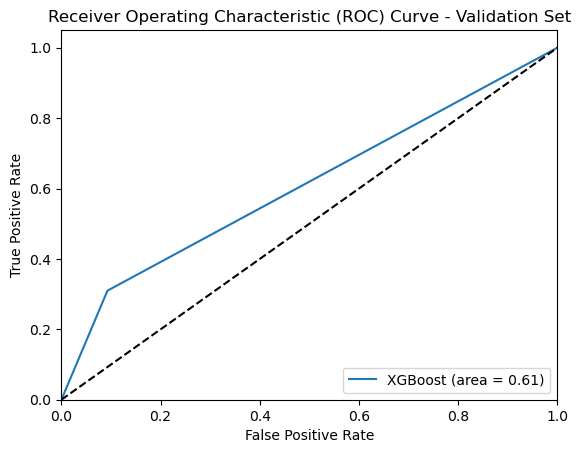

Testing Performance
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     45126
           1       0.32      0.32      0.32      5940

    accuracy                           0.84     51066
   macro avg       0.61      0.61      0.61     51066
weighted avg       0.84      0.84      0.84     51066



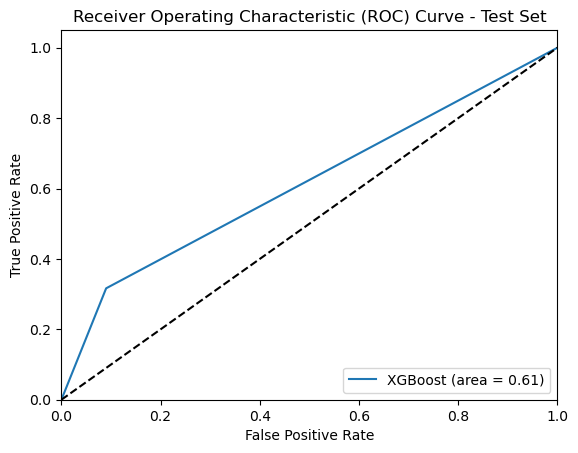

Elapsed Time for XGBoost: 30.902467727661133 seconds


In [55]:
import xgboost as xgb

# Define the classifier with default parameters
xgb_classifier = xgb.XGBClassifier(random_state=42)
# Define the parameter distribution for Randomized Search
param_dist_xgb = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Boosting learning rate
    'max_depth': [3, 4, 5],  # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node of the tree
}

# Set up the random search with stratified cross-validation on the training data
random_search_xgb = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist_xgb, scoring='f1', cv=stratified_cv, n_iter=10, n_jobs=-1, random_state=42, verbose=2)

# Start timer
start_time_xgb = time.time()

# Execute the random search on the resampled training data
random_search_xgb.fit(X_train_resampled, y_train_resampled)

# Output the best parameters and corresponding score
print("Best parameters found: ", random_search_xgb.best_params_)
print("Best F1 score found: ", random_search_xgb.best_score_)

# Predict on the validation data using the best model from random search
best_xgb = random_search_xgb.best_estimator_
y_pred_validation_xgb = best_xgb.predict(X_validation_scaled)

# Calculate and print evaluation metrics on validation data
print("Validation Performance")
print(classification_report(y_validation, y_pred_validation_xgb))

# Plot ROC Curve for the validation set
fpr_validation_xgb, tpr_validation_xgb, _ = roc_curve(y_validation, y_pred_validation_xgb)
roc_auc_validation_xgb = roc_auc_score(y_validation, y_pred_validation_xgb)
plt.figure()
plt.plot(fpr_validation_xgb, tpr_validation_xgb, label=f'XGBoost (area = {roc_auc_validation_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

# Finally, evaluate the model on the test set
y_pred_test_xgb = best_xgb.predict(X_test_scaled)

# End timer
end_time_xgb = time.time()

# Calculate and print evaluation metrics on test data
print("Testing Performance")
print(classification_report(y_test, y_pred_test_xgb))

# Plot ROC Curve for the test set
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_pred_test_xgb)
roc_auc_test_xgb = roc_auc_score(y_test, y_pred_test_xgb)
plt.figure()
plt.plot(fpr_test_xgb, tpr_test_xgb, label=f'XGBoost (area = {roc_auc_test_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc='lower right')
plt.show()

# Calculate total time for XGBoost
elapsed_time_xgb = end_time_xgb - start_time_xgb
print("Elapsed Time for XGBoost:", elapsed_time_xgb, "seconds")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\svm\_classes.py", line 325, in fit
    self.coef_, self.intercep

[LibLinear]Best parameters found:  {'verbose': 35, 'penalty': 'l2', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'intercept_scaling': 2.7, 'fit_intercept': False, 'dual': False, 'class_weight': 'balanced', 'C': 8.2}
Best F1 score found:  0.7058634495867024
Validation Performance
              precision    recall  f1-score   support

           0       0.95      0.54      0.68     45145
           1       0.18      0.79      0.29      5920

    accuracy                           0.56     51065
   macro avg       0.57      0.66      0.49     51065
weighted avg       0.86      0.56      0.64     51065



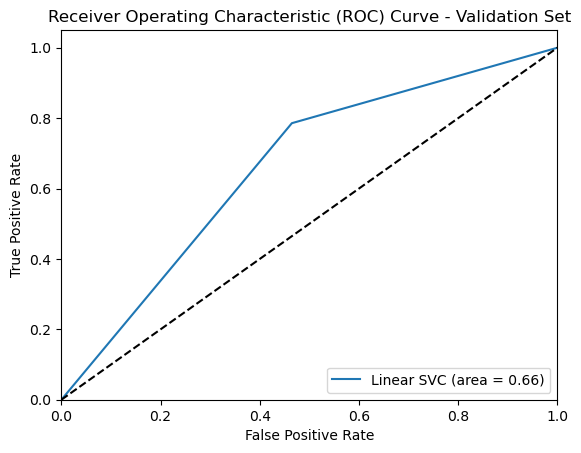

Testing Performance
              precision    recall  f1-score   support

           0       0.95      0.54      0.69     45126
           1       0.18      0.79      0.30      5940

    accuracy                           0.57     51066
   macro avg       0.57      0.66      0.49     51066
weighted avg       0.86      0.57      0.64     51066



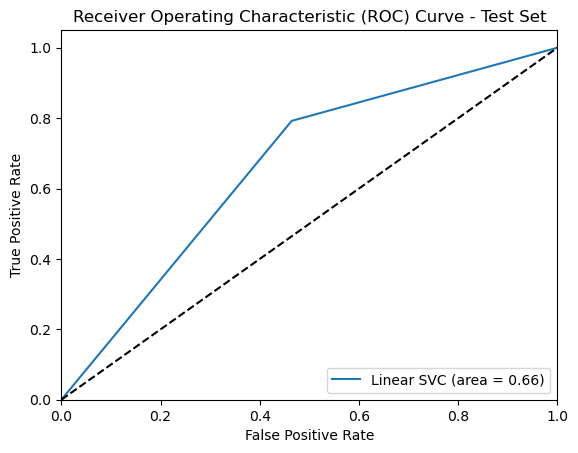

Elapsed Time for Linear SVC: 121.13204383850098 seconds


In [56]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the classifier with default parameters and balanced class weights
linear_svc_classifier = LinearSVC(class_weight='balanced', random_state=13)

# Define the parameter distribution for Randomized Search
param_dist_linear_svc = {
    "penalty": ["l2", "l1"],
    "loss": ["hinge", "squared_hinge"],
    "dual": [True, False],
    "multi_class" : ["ovr", "crammer_singer"],
    "C": [i / 10 for i in range(1, 101)],
    "fit_intercept": [True, False],
     "intercept_scaling": [i / 10 for i in range(1, 51)],
     "class_weight": ["balanced"],
     "verbose": [i for i in range(1, 51)]
}

# Set up the random search with stratified cross-validation on the training data
random_search_linear_svc = RandomizedSearchCV(estimator=linear_svc_classifier, param_distributions=param_dist_linear_svc, scoring='f1', cv=stratified_cv, n_iter=10, n_jobs=-1, random_state=42, verbose=2)

# Start timer
start_time_linear_svc = time.time()

# Execute the random search on the resampled training data
random_search_linear_svc.fit(X_train_resampled, y_train_resampled)

# Output the best parameters and corresponding score
print("Best parameters found: ", random_search_linear_svc.best_params_)
print("Best F1 score found: ", random_search_linear_svc.best_score_)

# Predict on the validation data using the best model from random search
best_linear_svc = random_search_linear_svc.best_estimator_
y_pred_validation_linear_svc = best_linear_svc.predict(X_validation_scaled)

# Calculate and print evaluation metrics on validation data
print("Validation Performance")
print(classification_report(y_validation, y_pred_validation_linear_svc))

# Plot ROC Curve for the validation set
fpr_validation_linear_svc, tpr_validation_linear_svc, _ = roc_curve(y_validation, y_pred_validation_linear_svc)
roc_auc_validation_linear_svc = roc_auc_score(y_validation, y_pred_validation_linear_svc)
plt.figure()
plt.plot(fpr_validation_linear_svc, tpr_validation_linear_svc, label=f'Linear SVC (area = {roc_auc_validation_linear_svc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

# Finally, evaluate the model on the test set
y_pred_test_linear_svc = best_linear_svc.predict(X_test_scaled)

# End timer
end_time_linear_svc = time.time()

# Calculate and print evaluation metrics on test data
print("Testing Performance")
print(classification_report(y_test, y_pred_test_linear_svc))

# Plot ROC Curve for the test set
fpr_test_linear_svc, tpr_test_linear_svc, _ = roc_curve(y_test, y_pred_test_linear_svc)
roc_auc_test_linear_svc = roc_auc_score(y_test, y_pred_test_linear_svc)
plt.figure()
plt.plot(fpr_test_linear_svc, tpr_test_linear_svc, label=f'Linear SVC (area = {roc_auc_test_linear_svc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc='lower right')
plt.show()

# Calculate total time for Linear SVC
elapsed_time_linear_svc = end_time_linear_svc - start_time_linear_svc
print("Elapsed Time for Linear SVC:", elapsed_time_linear_svc, "seconds")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'splitter': 'best', 'min_samples_split': 14, 'min_samples_leaf': 9, 'max_depth': 36, 'criterion': 'entropy'}
Best F1 score found:  0.8568180598551411
Validation Performance
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     45145
           1       0.23      0.27      0.25      5920

    accuracy                           0.81     51065
   macro avg       0.57      0.58      0.57     51065
weighted avg       0.82      0.81      0.82     51065



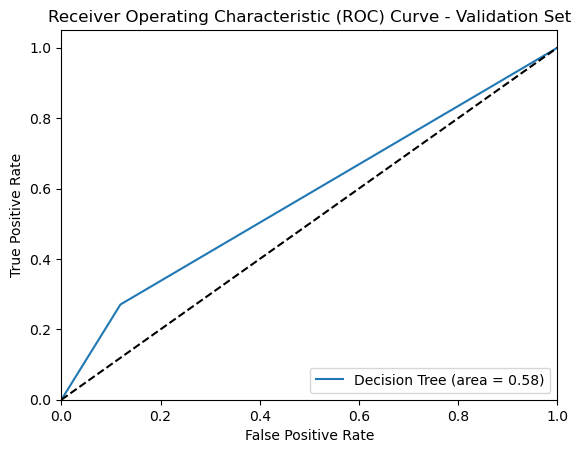

Testing Performance
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     45126
           1       0.23      0.28      0.25      5940

    accuracy                           0.81     51066
   macro avg       0.56      0.58      0.57     51066
weighted avg       0.82      0.81      0.81     51066



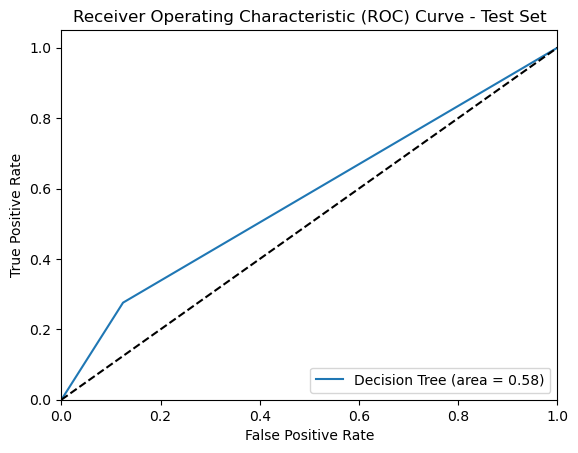

Elapsed Time for Decision Tree: 18.638081312179565 seconds


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the Decision Tree classifier with balanced class weights
dt = DecisionTreeClassifier(class_weight="balanced")

# Define the parameter distribution for Randomized Search
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
max_depth =  [i for i in range(1, 41, 5)]
min_samples_split =  [i for i in range(2, 21, 2)]
min_samples_leaf = [i for i in range(1, 21, 2)]
hyperparam = { "criterion" : criterion ,
              "max_depth" : max_depth,
              "min_samples_split" : min_samples_split,
              "splitter" : splitter ,
              "min_samples_leaf" : min_samples_leaf
               }

# Set up the random search with stratified cross-validation on the training data
random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=hyperparam, scoring='f1', cv=stratified_cv, n_iter=10, n_jobs=-1, random_state=42, verbose=2)

# Start timer
start_time_dt = time.time()

# Execute the random search on the resampled training data
random_search_dt.fit(X_train_resampled, y_train_resampled)

# Output the best parameters and corresponding score
print("Best parameters found: ", random_search_dt.best_params_)
print("Best F1 score found: ", random_search_dt.best_score_)

# Predict on the validation data using the best model from random search
best_dt = random_search_dt.best_estimator_
y_pred_validation_dt = best_dt.predict(X_validation_scaled)

# Calculate and print evaluation metrics on validation data
print("Validation Performance")
print(classification_report(y_validation, y_pred_validation_dt))

# Plot ROC Curve for the validation set
fpr_validation_dt, tpr_validation_dt, _ = roc_curve(y_validation, y_pred_validation_dt)
roc_auc_validation_dt = roc_auc_score(y_validation, y_pred_validation_dt)
plt.figure()
plt.plot(fpr_validation_dt, tpr_validation_dt, label=f'Decision Tree (area = {roc_auc_validation_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

# Finally, evaluate the model on the test set
y_pred_test_dt = best_dt.predict(X_test_scaled)

# End timer
end_time_dt = time.time()

# Calculate and print evaluation metrics on test data
print("Testing Performance")
print(classification_report(y_test, y_pred_test_dt))

# Plot ROC Curve for the test set
fpr_test_dt, tpr_test_dt, _ = roc_curve(y_test, y_pred_test_dt)
roc_auc_test_dt = roc_auc_score(y_test, y_pred_test_dt)
plt.figure()
plt.plot(fpr_test_dt, tpr_test_dt, label=f'Decision Tree (area = {roc_auc_test_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc='lower right')
plt.show()

# Calculate total time for Decision Tree
elapsed_time_dt = end_time_dt - start_time_dt
print("Elapsed Time for Decision Tree:", elapsed_time_dt, "seconds")

Epoch 1/30
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 4s 947us/step - accuracy: 0.6762 - auc: 0.7401 - loss: 0.6001 - recall: 0.6762 - val_accuracy: 0.6802 - val_auc: 0.7539 - val_loss: 0.5842 - val_recall: 0.6802
Epoch 2/30
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - accuracy: 0.6850 - auc: 0.7530 - loss: 0.5885 - recall: 0.6850 - val_accuracy: 0.6938 - val_auc: 0.7676 - val_loss: 0.5738 - val_recall: 0.6938
Epoch 3/30
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - accuracy: 0.6848 - auc: 0.7533 - loss: 0.5882 - recall: 0.6848 - val_accuracy: 0.6617 - val_auc: 0.7230 - val_loss: 0.6153 - val_recall: 0.6617
Epoch 4/30
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - accuracy: 0.6877 - auc: 0.7559 - loss: 0.5860 - recall: 0.6877 - val_accuracy: 0.6967 - val_auc: 0.7679 - val_loss: 0.5738 - val_recall: 0.6967
Epoch 5/30
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step - accuracy: 0.6880 - auc: 0.7575 - loss: 0.5842 - recall: 0.6880 - val_accuracy: 0.6507 - val_auc: 0.7164 - val_loss: 0.6165 - val_recal

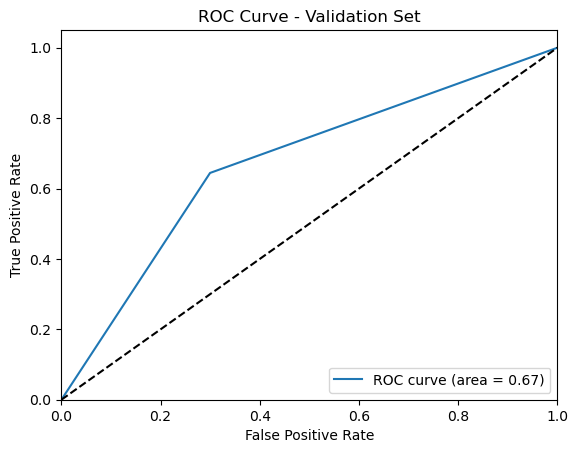

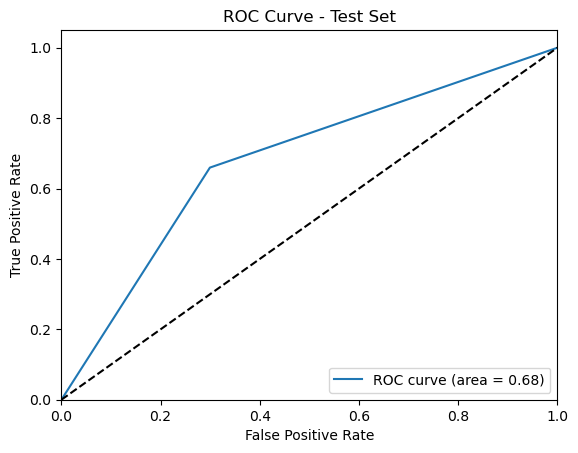

In [58]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC, Recall
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

def build_neural_network(input_shape=(7,), output_units=2):
    neural_network = Sequential()
    neural_network.add(Input(shape=input_shape))
    neural_network.add(Dense(64, activation="relu"))
    neural_network.add(Dense(32, activation="relu"))
    neural_network.add(Dense(output_units, activation="softmax", name="OutputLayer"))
    return neural_network

def train_neural_network(neural_network, X_train, y_train, X_val, y_val, class_weights=None, epochs=30, batch_size=100):
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    neural_network.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy', AUC(), Recall()])
    history = neural_network.fit(X_train, to_categorical(y_train), epochs=epochs, batch_size=batch_size, class_weight=class_weights,
                                  validation_data=(X_val, to_categorical(y_val)), callbacks=[early_stopping])
    return neural_network, history

# Compute class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weights = dict(enumerate(class_weights))

# Build and train the neural network
neural_network = build_neural_network(input_shape=(7,), output_units=2)
neural_network, history = train_neural_network(neural_network, X_train_resampled, y_train_resampled, X_validation_scaled, y_validation,
                                                class_weights=class_weights)

# Evaluate the model on the validation set
y_val_predict_auc = neural_network.predict(X_validation_scaled)
y_val_pred = np.argmax(y_val_predict_auc, axis=1)
val_auc = roc_auc_score(y_validation, y_val_pred)

# Print classification report and ROC AUC score for the validation set
print("Validation set performance:")
print(classification_report(y_validation, y_val_pred))
print("ROC AUC:", val_auc)

# Evaluate the model on the test set
y_test_predict_auc = neural_network.predict(X_test_scaled)
y_test_pred = np.argmax(y_test_predict_auc, axis=1)
test_auc = roc_auc_score(y_test, y_test_pred)

# Print classification report and ROC AUC score for the test set
print("\nTest set performance:")
print(classification_report(y_test, y_test_pred))
print("ROC AUC:", test_auc)

# Calculate ROC curve for the validation set
fpr_val, tpr_val, _ = roc_curve(y_validation, y_val_pred)
roc_auc_val = roc_auc_score(y_validation, y_val_pred)

# Plot ROC curve for the validation set
plt.figure()
plt.plot(fpr_val, tpr_val, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc="lower right")
plt.show()

# Calculate ROC curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

# Plot ROC curve for the test set
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend(loc="lower right")
plt.show()




# Ensembling all the models (excluding decision trees)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

# Timing
start_time_2layerStack = time.time()

# Define Layer 0 classifiers including the custom neural network
classifiers_layer0 = {
    'Random Forest': RandomForestClassifier(random_state=13, criterion='entropy', class_weight='balanced',
                                          n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=2),
    'Linear SVC': LinearSVC(random_state=42, class_weight='balanced', penalty='l2', loss='squared_hinge', dual=False, C=10), 
    'k-NN': KNeighborsClassifier(n_neighbors=40),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(n_estimators=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, subsample=0.9, n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=4, learning_rate=0.05),
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced', penalty='l2', C=0.001),
    'Neural Network': MLPClassifier(random_state=42)
}

# Define Layer 1 classifiers including the custom neural network
classifiers_layer1 = {
    'Neural Network': MLPClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=13, criterion='entropy', class_weight='balanced',
                                          n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=2),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, subsample=0.9, n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=4, learning_rate=0.05)
}

# Initialize stacked ensemble arrays
layer0_train = np.zeros((len(X_train_resampled), len(classifiers_layer0)))
layer0_validation = np.zeros((len(X_validation_scaled), len(classifiers_layer0)))
layer0_test = np.zeros((len(X_test_scaled), len(classifiers_layer0)))

# Train Layer 0 classifiers
for i, (name, clf) in enumerate(classifiers_layer0.items()):
    clf.fit(X_train_resampled, y_train_resampled)
    layer0_train[:, i] = clf.predict(X_train_resampled)
    layer0_validation[:, i] = clf.predict(X_validation_scaled)
    layer0_test[:, i] = clf.predict(X_test_scaled)

# Initialize stacked ensemble arrays for Layer 1 classifiers
layer1_train = np.zeros((len(X_train_resampled), len(classifiers_layer1)))
layer1_validation = np.zeros((len(X_validation_scaled), len(classifiers_layer1)))
layer1_test = np.zeros((len(X_test_scaled), len(classifiers_layer1)))

# Train Layer 1 classifiers
for i, (name, clf) in enumerate(classifiers_layer1.items()):
    clf.fit(layer0_train, y_train_resampled)
    layer1_train[:, i] = clf.predict(layer0_train)
    layer1_validation[:, i] = clf.predict(layer0_validation)
    layer1_test[:, i] = clf.predict(layer0_test)

# Final layer classifier
final_layer_clf = MLPClassifier(random_state=42)
final_layer_clf.fit(layer1_train, y_train_resampled)

# Make predictions on validation set
final_predictions_validation = final_layer_clf.predict(layer1_validation)

end_time_2layerStack = time.time()
fitting_time = end_time_2layerStack - start_time_2layerStack
print("Fitting Time:", fitting_time, "seconds")

# Print classification report and ROC AUC for validation set
print("Validation Classification Report:")
print(classification_report(y_validation, final_predictions_validation))
val_auc = roc_auc_score(y_validation, final_predictions_validation)
print("Validation ROC AUC:", val_auc)

# Make predictions on test set
final_predictions_test = final_layer_clf.predict(layer1_test)

# Print classification report and ROC AUC for test set
print("\nTest Classification Report:")
print(classification_report(y_test, final_predictions_test))
test_auc = roc_auc_score(y_test, final_predictions_test)
print("Test ROC AUC:", test_auc)



Fitting Time: 529.6522891521454 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83     45145
           1       0.21      0.50      0.30      5920

    accuracy                           0.73     51065
   macro avg       0.57      0.63      0.56     51065
weighted avg       0.84      0.73      0.77     51065

Validation ROC AUC: 0.626640350686826

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83     45126
           1       0.22      0.51      0.30      5940

    accuracy                           0.73     51066
   macro avg       0.57      0.63      0.57     51066
weighted avg       0.84      0.73      0.77     51066

Test ROC AUC: 0.6318826142021197


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.ensemble import StackingClassifier

# Timing
start_time_1layerStack = time.time()

# Define Layer 0 classifiers 
classifiers_layer0 = {
    'Random Forest': RandomForestClassifier(random_state=13, criterion='entropy', class_weight='balanced',
                                             n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=2),
    'Linear SVC': LinearSVC(random_state=42, class_weight='balanced', penalty='l2', loss='squared_hinge', dual=False, C=10), 
    'k-NN': KNeighborsClassifier(n_neighbors=40),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(n_estimators=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, subsample=0.9, n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=4, learning_rate=0.05),
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced', penalty='l2', C=0.001),
    'Neural Network': MLPClassifier(random_state=42)
}

# Combine all base layer classifiers into one Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[(name, clf) for name, clf in classifiers_layer0.items()],
    final_estimator=LogisticRegression(random_state=42)
)

# Train the Stacking Classifier
stacking_clf.fit(X_train_resampled, y_train_resampled)

end_time_1layerStack = time.time()
fitting_time = end_time_1layerStack - start_time_1layerStack
print("Fitting Time:", fitting_time, "seconds")

# Make predictions on validation set
final_predictions_validation = stacking_clf.predict(X_validation_scaled)

# Print classification report and ROC AUC for validation set
print("Validation Classification Report:")
print(classification_report(y_validation, final_predictions_validation))
val_auc = roc_auc_score(y_validation, final_predictions_validation)
print("Validation ROC AUC:", val_auc)

# Make predictions on test set
final_predictions_test = stacking_clf.predict(X_test_scaled)

# Print classification report and ROC AUC for test set
print("\nTest Classification Report:")
print(classification_report(y_test, final_predictions_test))
test_auc = roc_auc_score(y_test, final_predictions_test)
print("Test ROC AUC:", test_auc)



Fitting Time: 1926.3066527843475 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     45145
           1       0.24      0.34      0.28      5920

    accuracy                           0.80     51065
   macro avg       0.57      0.60      0.58     51065
weighted avg       0.83      0.80      0.81     51065

Validation ROC AUC: 0.5978658575371252

Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     45126
           1       0.24      0.34      0.28      5940

    accuracy                           0.80     51066
   macro avg       0.58      0.60      0.58     51066
weighted avg       0.83      0.80      0.81     51066

Test ROC AUC: 0.6012016857848529


Running
[LibLinear]Fitting Time: 252.59326934814453 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     45145
           1       0.22      0.65      0.33      5920

    accuracy                           0.69     51065
   macro avg       0.58      0.67      0.57     51065
weighted avg       0.85      0.69      0.75     51065

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     45126
           1       0.22      0.65      0.33      5940

    accuracy                           0.70     51066
   macro avg       0.58      0.68      0.57     51066
weighted avg       0.86      0.70      0.75     51066



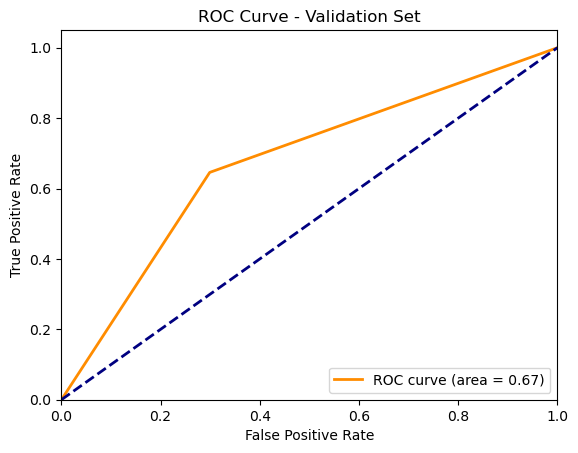

In [77]:
import time
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import warnings

# To suppress all warnings
warnings.filterwarnings("ignore")

print("Running")
# Timing
start_time_vc = time.time()
# Define your models
models = {
    'rf':RandomForestClassifier(random_state=13, criterion='entropy', class_weight='balanced',
                                          n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=2),
    'svm':  LinearSVC(class_weight="balanced", **{'verbose': 10, 'penalty': 'l1', 'multi_class': 'crammer_singer', 'loss': 'hinge', 'intercept_scaling': 1.6, 'fit_intercept': True, 'dual': False, 'C': 1.5}),
    'nb': GaussianNB(),
    'Neural Network': MLPClassifier(random_state=42),
    'lr': LogisticRegression(**{'warm_start': False, 'solver': 'sag', 'penalty': None, 'multi_class': 'multinomial', 'intercept_scaling': 3.9, 'fit_intercept': False, 'class_weight': 'balanced', 'C': 2.3}),
    'gb': GradientBoostingClassifier(random_state=42, subsample=0.9, n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=4, learning_rate=0.05),
}

# Define the estimators for stacking
estimators = [(name, model) for name, model in models.items()]

# Create the stacking classifier
sc = VotingClassifier(estimators=estimators)

sc.fit(X_train_resampled, y_train_resampled)
end_time_vc = time.time()
fitting_time = end_time - start_time
print("Fitting Time:", fitting_time, "seconds")

# Classification Reports
Y_val_pred = sc.predict(X_validation_scaled)
Y_test_pred = sc.predict(X_test_scaled)

print("Validation Classification Report:")
print(classification_report(y_validation, Y_val_pred))

print("Testing Classification Report:")
print(classification_report(y_test, Y_test_pred))

# ROC AUC Plot
val_roc_auc = roc_auc_score(y_validation, Y_val_pred)
fpr, tpr, _ = roc_curve(y_validation, Y_val_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % val_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc="lower right")
plt.show()


# Summary of findings

In [81]:
final_output = pd.DataFrame()
final_output["Model"] = None
final_output["Accuracy"] = None
final_output["Recall"] = None
final_output["Precision"] = None
final_output["AUC"] = None
final_output["F1_Score"] = None
final_output["time"] = None

In [82]:
def add_metrics(model , Y_test, Y_pred, final_output, timeElapsed):
  auc = roc_auc_score(Y_test, Y_pred)
  precision = precision_score(Y_test, Y_pred)
  acc = accuracy_score(Y_test, Y_pred)
  recall = recall_score(Y_test, Y_pred)
  f1 = f1_score(Y_test, Y_pred)
  new_row = {"Model" : model, "AUC" : auc, "Precision" : precision , "Accuracy" : acc, "F1_Score" : f1, "Recall"  : recall , "time" : timeElapsed }
  print(new_row)
  return new_row

In [86]:
# Define classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42, splitter='best', min_samples_split=14, min_samples_leaf=9, max_depth=36, criterion='entropy'),
    'Random Forest': RandomForestClassifier(random_state=42, criterion='entropy', class_weight='balanced',
                                             n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=2),
    'Linear SVC': LinearSVC(random_state=42, verbose=35, penalty='l2', multi_class='ovr', loss='squared_hinge', intercept_scaling=2.7, fit_intercept=False, dual=False, class_weight='balanced', C=8.2),  
    'k-NN': KNeighborsClassifier(n_neighbors=37),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(random_state=42, subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=5, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, subsample=0.9, n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=4, learning_rate=0.05),
    'Logistic Regression': LogisticRegression(random_state=42, warm_start=False, solver='sag', penalty=None, multi_class='multinomial', intercept_scaling=3.9, fit_intercept=False, 
                                               class_weight='balanced', C=2.3),
}

# Loop through classifiers and calculate evaluation metrics on validation and test datasets
for classifier_name, classifier in classifiers.items():
    start_time = time.time()  # Start timing
    
    # Train the classifier on resampled training data
    classifier.fit(X_train_resampled, y_train_resampled)
    
    # Test the classifier on test dataset
    y_pred_test = classifier.predict(X_test_scaled)
    
    end_time = time.time()  # End timing
    execution_time = end_time - start_time
    new_row =  add_metrics(classifier_name, y_test, y_pred_test, final_output, execution_time)
    final_output = pd.concat([final_output, pd.DataFrame([new_row])], ignore_index=True)

{'Model': 'Decision Tree', 'AUC': 0.5753960291654747, 'Precision': 0.22534435261707988, 'Accuracy': 0.8055849293071711, 'F1_Score': 0.24787878787878787, 'Recall': 0.2754208754208754, 'time': 5.149728775024414}
{'Model': 'Random Forest', 'AUC': 0.6694383000326358, 'Precision': 0.22323736250525936, 'Accuracy': 0.703344691183958, 'F1_Score': 0.32900739690835806, 'Recall': 0.6252525252525253, 'time': 140.80764770507812}
[LibLinear]{'Model': 'Linear SVC', 'AUC': 0.6639491914222667, 'Precision': 0.18341649773896773, 'Accuracy': 0.5656209611091528, 'F1_Score': 0.29786021777665234, 'Recall': 0.7920875420875421, 'time': 0.12690377235412598}
{'Model': 'k-NN', 'AUC': 0.6422543141829141, 'Precision': 0.1900646881635475, 'Accuracy': 0.6378608075823444, 'F1_Score': 0.2939177580084762, 'Recall': 0.647979797979798, 'time': 14.665785312652588}
{'Model': 'Naive Bayes', 'AUC': 0.6740293843903736, 'Precision': 0.20879732739420936, 'Accuracy': 0.6583636862100027, 'F1_Score': 0.3210616438356164, 'Recall': 0

In [88]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC, Recall
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

def build_neural_network(input_shape=(7,), output_units=2):
    neural_network = Sequential()
    neural_network.add(Input(shape=input_shape))
    neural_network.add(Dense(64, activation="relu"))
    neural_network.add(Dense(32, activation="relu"))
    neural_network.add(Dense(output_units, activation="softmax", name="OutputLayer"))
    return neural_network

def train_neural_network(neural_network, X_train, y_train, X_val, y_val, class_weights=None, epochs=30, batch_size=100):
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    neural_network.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy', AUC(), Recall()])
    history = neural_network.fit(X_train, to_categorical(y_train), epochs=epochs, batch_size=batch_size, class_weight=class_weights,
                                  validation_data=(X_val, to_categorical(y_val)), callbacks=[early_stopping])
    return neural_network, history

# Compute class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weights = dict(enumerate(class_weights))

start_time = time.time()
# Build and train the neural network
neural_network = build_neural_network(input_shape=(7,), output_units=2)
neural_network, history = train_neural_network(neural_network, X_train_resampled, y_train_resampled, X_validation_scaled, y_validation,
                                                class_weights=class_weights)


# Evaluate the model on the test set
y_test_predict_auc = neural_network.predict(X_test_scaled)
y_test_pred = np.argmax(y_test_predict_auc, axis=1)

end_time = time.time()  # End timing
execution_time = end_time - start_time

new_row =  add_metrics("Neural Networks", y_test, y_test_pred, final_output, execution_time)
final_output = pd.concat([final_output, pd.DataFrame([new_row])], ignore_index=True)

Epoch 1/30
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 4s 929us/step - accuracy: 0.6725 - auc_1: 0.7364 - loss: 0.6018 - recall_1: 0.6725 - val_accuracy: 0.6759 - val_auc_1: 0.7498 - val_loss: 0.5874 - val_recall_1: 0.6759
Epoch 2/30
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 2s 830us/step - accuracy: 0.6845 - auc_1: 0.7521 - loss: 0.5892 - recall_1: 0.6845 - val_accuracy: 0.6822 - val_auc_1: 0.7550 - val_loss: 0.5838 - val_recall_1: 0.6822
Epoch 3/30
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - accuracy: 0.6872 - auc_1: 0.7562 - loss: 0.5855 - recall_1: 0.6872 - val_accuracy: 0.6529 - val_auc_1: 0.7172 - val_loss: 0.6182 - val_recall_1: 0.6529
Epoch 4/30
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 2s 837us/step - accuracy: 0.6865 - auc_1: 0.7560 - loss: 0.5855 - recall_1: 0.6865 - val_accuracy: 0.6728 - val_auc_1: 0.7426 - val_loss: 0.5954 - val_recall_1: 0.6728
Epoch 5/30
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.6878 - auc_1: 0.7564 - loss: 0.5851 - recall_1: 0.6878 - val_accuracy: 0.6949 - val_auc_1:

In [90]:
final_output

,Model,Accuracy,Recall,Precision,AUC,F1_Score,time
0,Decision Tree,0.805585,0.275421,0.225344,0.575396,0.247879,5.149729
1,Random Forest,0.703345,0.625253,0.223237,0.669438,0.329007,140.807648
2,Linear SVC,0.565621,0.792088,0.183416,0.663949,0.297860,0.126904
3,k-NN,0.637861,0.647980,0.190065,0.642254,0.293918,14.665785
4,Naive Bayes,0.658364,0.694444,0.208797,0.674029,0.321062,0.047808
5,XGBoost,0.840794,0.316498,0.315966,0.613153,0.316232,1.886666
6,Gradient Boosting,0.763933,0.522896,0.251967,0.659278,0.340067,153.505294
7,Logistic Regression,0.565641,0.792593,0.183498,0.664180,0.298003,5.832941
8,Neural Networks,0.696510,0.659091,0.225155,0.680263,0.335648,21.549155


# Predicting default for 20 rows of data

In [94]:
#Standard deviation and mean value of train df

std_deviation = train_df.std()
mean_value = train_df.mean()

print("Standard Deviation:")
print(std_deviation)
print("\nMean:")
print(mean_value).mean()


Standard Deviation:
Age                   14.987223
Income             38966.171346
LoanAmount         70821.940574
CreditScore          158.811176
MonthsEmployed        34.650674
NumCreditLines         1.116448
InterestRate           6.636598
LoanTerm              16.983340
DTIRatio               0.231089
Education_level        1.117898
EmploymentType         1.117516
MaritalStatus          0.815573
HasMortgage            0.500001
HasDependents          0.500001
HasCoSigner            0.500001
Default                0.320361
Auto                   0.399215
Business               0.401059
Education              0.399274
Home                   0.400616
Other                  0.399834
dtype: float64

Mean:
Age                    43.518937
Income              82554.763114
LoanAmount         127485.751501
CreditScore           573.949803
MonthsEmployed         59.539009
NumCreditLines          2.503714
InterestRate           13.489290
LoanTerm               36.020679
DTIRatio              

In [103]:
# Re-loading the original dataset
new_df = pd.read_csv(r'C:\Users\Acer\Downloads\((GAssign) NewApplicants.csv')

In [104]:
new_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,A01,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,NaN
1,A02,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,NaN
2,A03,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,NaN
3,A04,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,NaN
4,A05,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,NaN
5,A06,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,NaN
6,A07,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,NaN
7,A08,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,NaN
8,A09,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,NaN
9,A10,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,NaN


In [110]:
X_apply = new_df[['Income', 'InterestRate', 'LoanAmount', 'Age', 'CreditScore',
          'MonthsEmployed', 'DTIRatio']]


In [113]:
train_df = train_df[['Income', 'InterestRate', 'LoanAmount', 'Age', 'CreditScore',
          'MonthsEmployed', 'DTIRatio']]
std_deviation = train_df.std()
mean_value = train_df.mean()

# Manually standardize X_train
X_standardized_new = (X_apply - mean_value) / std_deviation

In [119]:
# Predict using the voting classifier
Y_pred_new = sc.predict(X_standardized_new)

print(Y_pred_new)

[0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0]


In [123]:
# Reshape Y_pred_new to have one column
Y_pred_new_reshaped = Y_pred_new.reshape(-1, 1)

# Predict default using the voting classifier
new_df['default'] = Y_pred_new_reshaped

# Display the DataFrame with the new 'default' column
new_df


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,default
0,A01,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,A02,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,A03,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,A04,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,A05,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A06,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,A07,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,1
7,A08,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,A09,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,A10,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0
